In [311]:
import pandas as pd
import numpy as np
from pyarrow import Table
import pyarrow.dataset as ds
import pyarrow.compute as pc
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from source import *
from pathlib import Path

import scienceplots

plt.style.use(['science','ieee', 'grid'])
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [312]:
sig = ds.dataset(list(Path(f"new_sig/").glob("*.parquet")), format="parquet")

In [313]:
lep = ds.dataset(list(Path(f"gen_data/").glob("*.parquet")), format="parquet")

In [314]:
scanner = lep.scanner(batch_size=100_000)
for batch in scanner.to_batches():
    table = Table.from_batches([batch])
    display(table.to_pandas().columns)
    break
del scanner

Index(['__experiment__', '__run__', '__event__', '__production__', 'pcm',
       'ecm', 'missedE', 'recM2_Ups', 'cmpmiss', 'cmthetamiss', 'fox_ups',
       'asymmetry', 'pBtag', 'theta_Btag', 'MBtag', 'rec_theta_Btag', 'idec0',
       'idec1', 'is0', 'N_KL', 'Miss_id_0', 'Miss_id_1', 'Bs_lik', 'N_KS',
       'theta_tau_0', 'p_tau_0', 'theta_tau_1', 'p_tau_1', 'p_tau_0_tagcm',
       'p_tau_1_tagcm', 'ang_taus', 'ang_taus_tagcm', 'ang_tau0_pmiss',
       'ang_tau1_pmiss', 'ang_tau1_ROE', 'ang_tau0_ROE', 'tau_d_0_0',
       'tau_d_1_0', 'tau_last_z_0', 'tau_last_r_0', 'tau_last_z_1',
       'tau_last_r_1', 'Istau0', 'Istau1', 'totalEnergyMC', 'E_gamma_in_ROE',
       'correct_nu_0', 'correct_nu_1', 'correct_gamma_0', 'correct_gamma_1',
       'lost_0', 'lost_1', 'PID_self_vs_0_tau0', 'PID_self_vs_1_tau0',
       'PID_self_vs_2_tau0', 'PID_self_vs_4_tau0', 'PID_self_vs_0_tau1',
       'PID_self_vs_1_tau1', 'PID_self_vs_2_tau1', 'PID_self_vs_4_tau1'],
      dtype='object')

In [315]:
scanner = sig.scanner(batch_size=100_000)
for batch in scanner.to_batches():
    table = Table.from_batches([batch])
    display(table.to_pandas().columns)
    break
del scanner

Index(['__experiment__', '__run__', '__event__', '__production__', 'pcm',
       'ecm', 'missedE', 'recM2_Ups', 'cmpmiss', 'cmthetamiss', 'fox_ups',
       'asymmetry', 'pBtag', 'theta_Btag', 'MBtag', 'rec_theta_Btag', 'idec0',
       'idec1', 'is0', 'N_KL', 'Miss_id_0', 'Miss_id_1', 'Bs_lik', 'N_KS',
       'theta_tau_0', 'p_tau_0', 'theta_tau_1', 'p_tau_1', 'p_tau_0_tagcm',
       'p_tau_1_tagcm', 'ang_taus', 'ang_taus_tagcm', 'ang_tau0_pmiss',
       'ang_tau1_pmiss', 'ang_tau1_ROE', 'ang_tau0_ROE', 'tau_d_0_0',
       'tau_d_1_0', 'tau_last_z_0', 'tau_last_r_0', 'tau_last_z_1',
       'tau_last_r_1', 'Istau0', 'Istau1', 'totalEnergyMC', 'E_gamma_in_ROE',
       'correct_nu_0', 'correct_nu_1', 'correct_gamma_0', 'correct_gamma_1',
       'lost_0', 'lost_1', 'PID_self_vs_0_tau0', 'PID_self_vs_1_tau0',
       'PID_self_vs_2_tau0', 'PID_self_vs_4_tau0', 'PID_self_vs_0_tau1',
       'PID_self_vs_1_tau1', 'PID_self_vs_2_tau1', 'PID_self_vs_4_tau1'],
      dtype='object')

In [316]:
decay_mod_tau = ["$e^+ \\nu_e \\bar \\nu_\\tau$", "$\mu^+ \\nu_\\mu \\bar \\nu_\\tau$", "$\\pi^+ \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\pi^0) \\bar \\nu_\\tau$", "$\\pi^+ \\pi^+ \\pi^- \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\gamma) \\bar \\nu_\\tau$"]
mask = (pc.field("E_gamma_in_ROE") < 1.2) & (pc.field("Bs_lik") > 0.0012) & (pc.field("N_KS") < 0.5)
mask_M = (pc.field("M0") > 5.347) &  (pc.field("M0") < 5.387) 
mask_is1 = pc.field("correct_nu_0") & pc.field("correct_nu_1") & pc.field("correct_gamma_0") & pc.field("correct_gamma_1") & pc.field("lost_0") & pc.field("lost_1") & pc.field("Miss_id_0") & pc.field("Miss_id_1")
mask_is0 = pc.field("is0") == 1
mask_miss_id = pc.field("Miss_id_0") & pc.field("Miss_id_1")
mask_lost_Kpi = pc.field("lost_0") & pc.field("lost_1")
mask_KS_veto = (pc.field("N_KS") == 0) & (pc.field("N_KL") == 0)

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\matve\AppData\Local\Temp\ipykernel_12860\2528252791.py:1: SyntaxWarning: invalid escape sequence '\m'
  decay_mod_tau = ["$e^+ \\nu_e \\bar \\nu_\\tau$", "$\mu^+ \\nu_\\mu \\bar \\nu_\\tau$", "$\\pi^+ \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\pi^0) \\bar \\nu_\\tau$", "$\\pi^+ \\pi^+ \\pi^- \\bar \\nu_\\tau$", "$\\rho^+ (\\pi^+ \\gamma) \\bar \\nu_\\tau$"]


In [317]:
mask_lep = ((pc.field("idec0") == 0) | (pc.field("idec0") == 1)) & ((pc.field("idec1") == 0) | (pc.field("idec1") == 1))
mask_pi = ((pc.field("idec0") == 2) & (pc.field("idec0") == 2))
mask_rho = ((pc.field("idec0") == 3) & (pc.field("idec0") == 3))
mask_pi_rho = ((pc.field("idec0") == 2) & (pc.field("idec1") == 3)) | ((pc.field("idec0") == 3) & (pc.field("idec1") == 2))
mask_chen = mask_pi_rho

In [318]:
mask_sig = mask_chen & (pc.field("is0") == 1) & mask & mask_is1
mask_bkg = mask_chen & (pc.field("is0") == 0) & mask

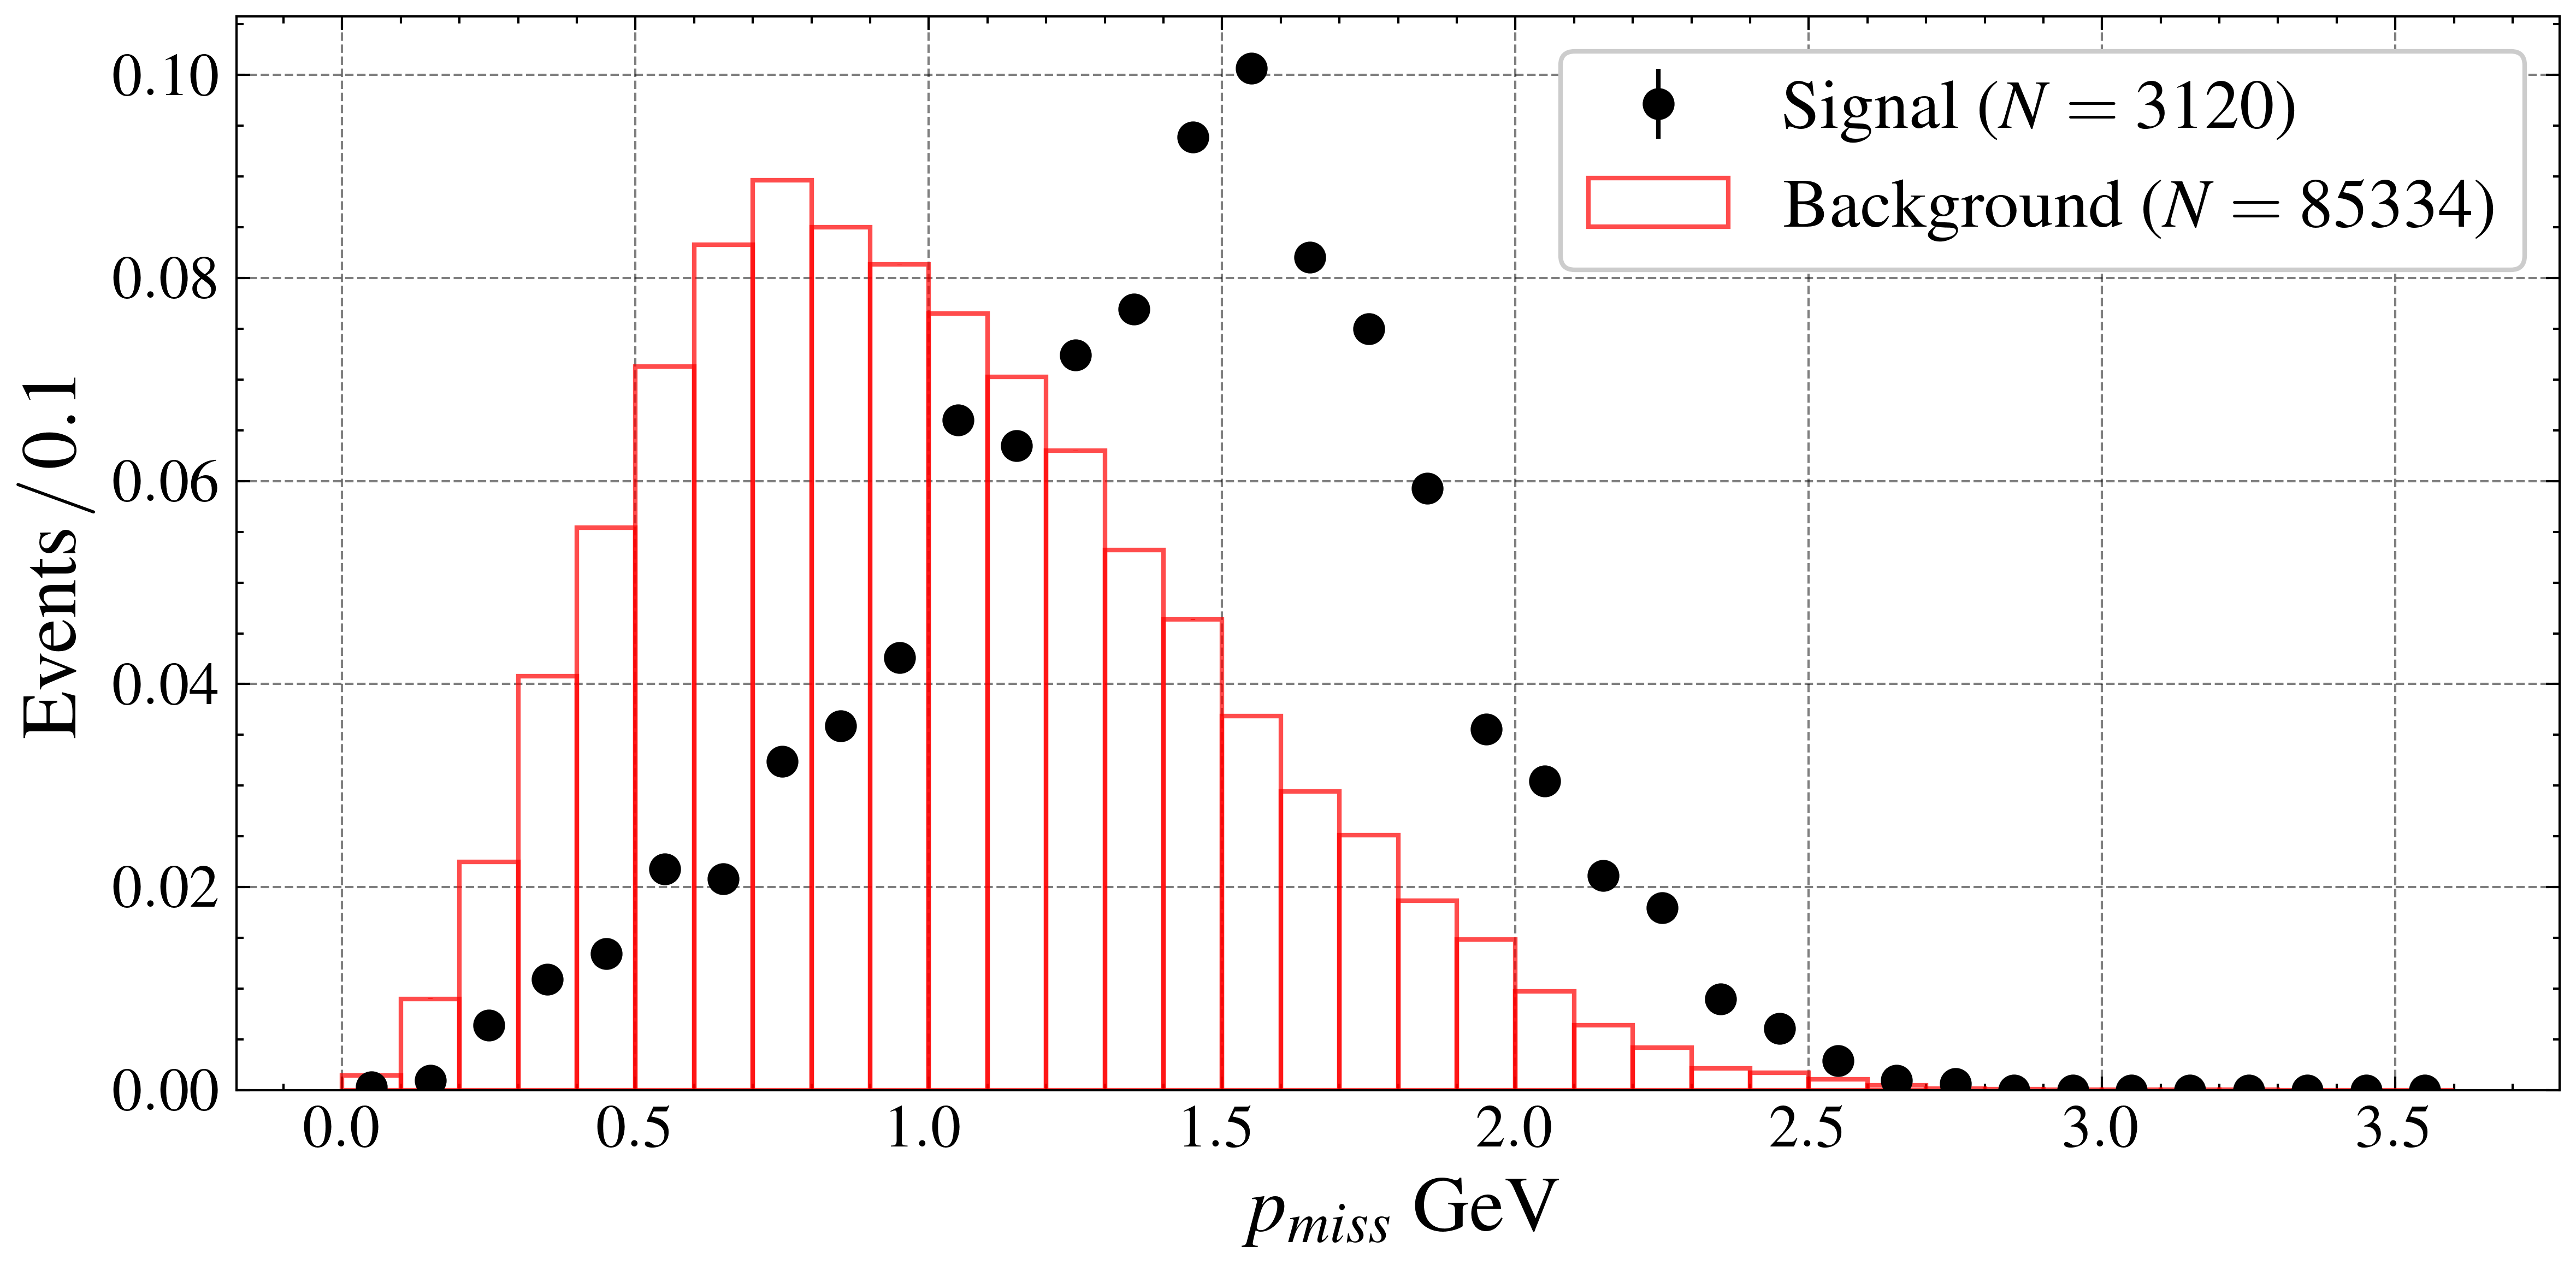

In [319]:
wbin = 0.1
a = 0
b = 3.6
bins = np.linspace(a, b, int((b-a)/wbin + 1))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))


bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "cmpmiss",
    filter_mask=mask_sig
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)" )


# Background
bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "cmpmiss",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep)/N_lep,
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)


ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$p_{miss} \ \mathrm{GeV}$')
ax.legend()

plt.tight_layout()
plt.savefig("output/cmpmiss.pdf")
plt.show()

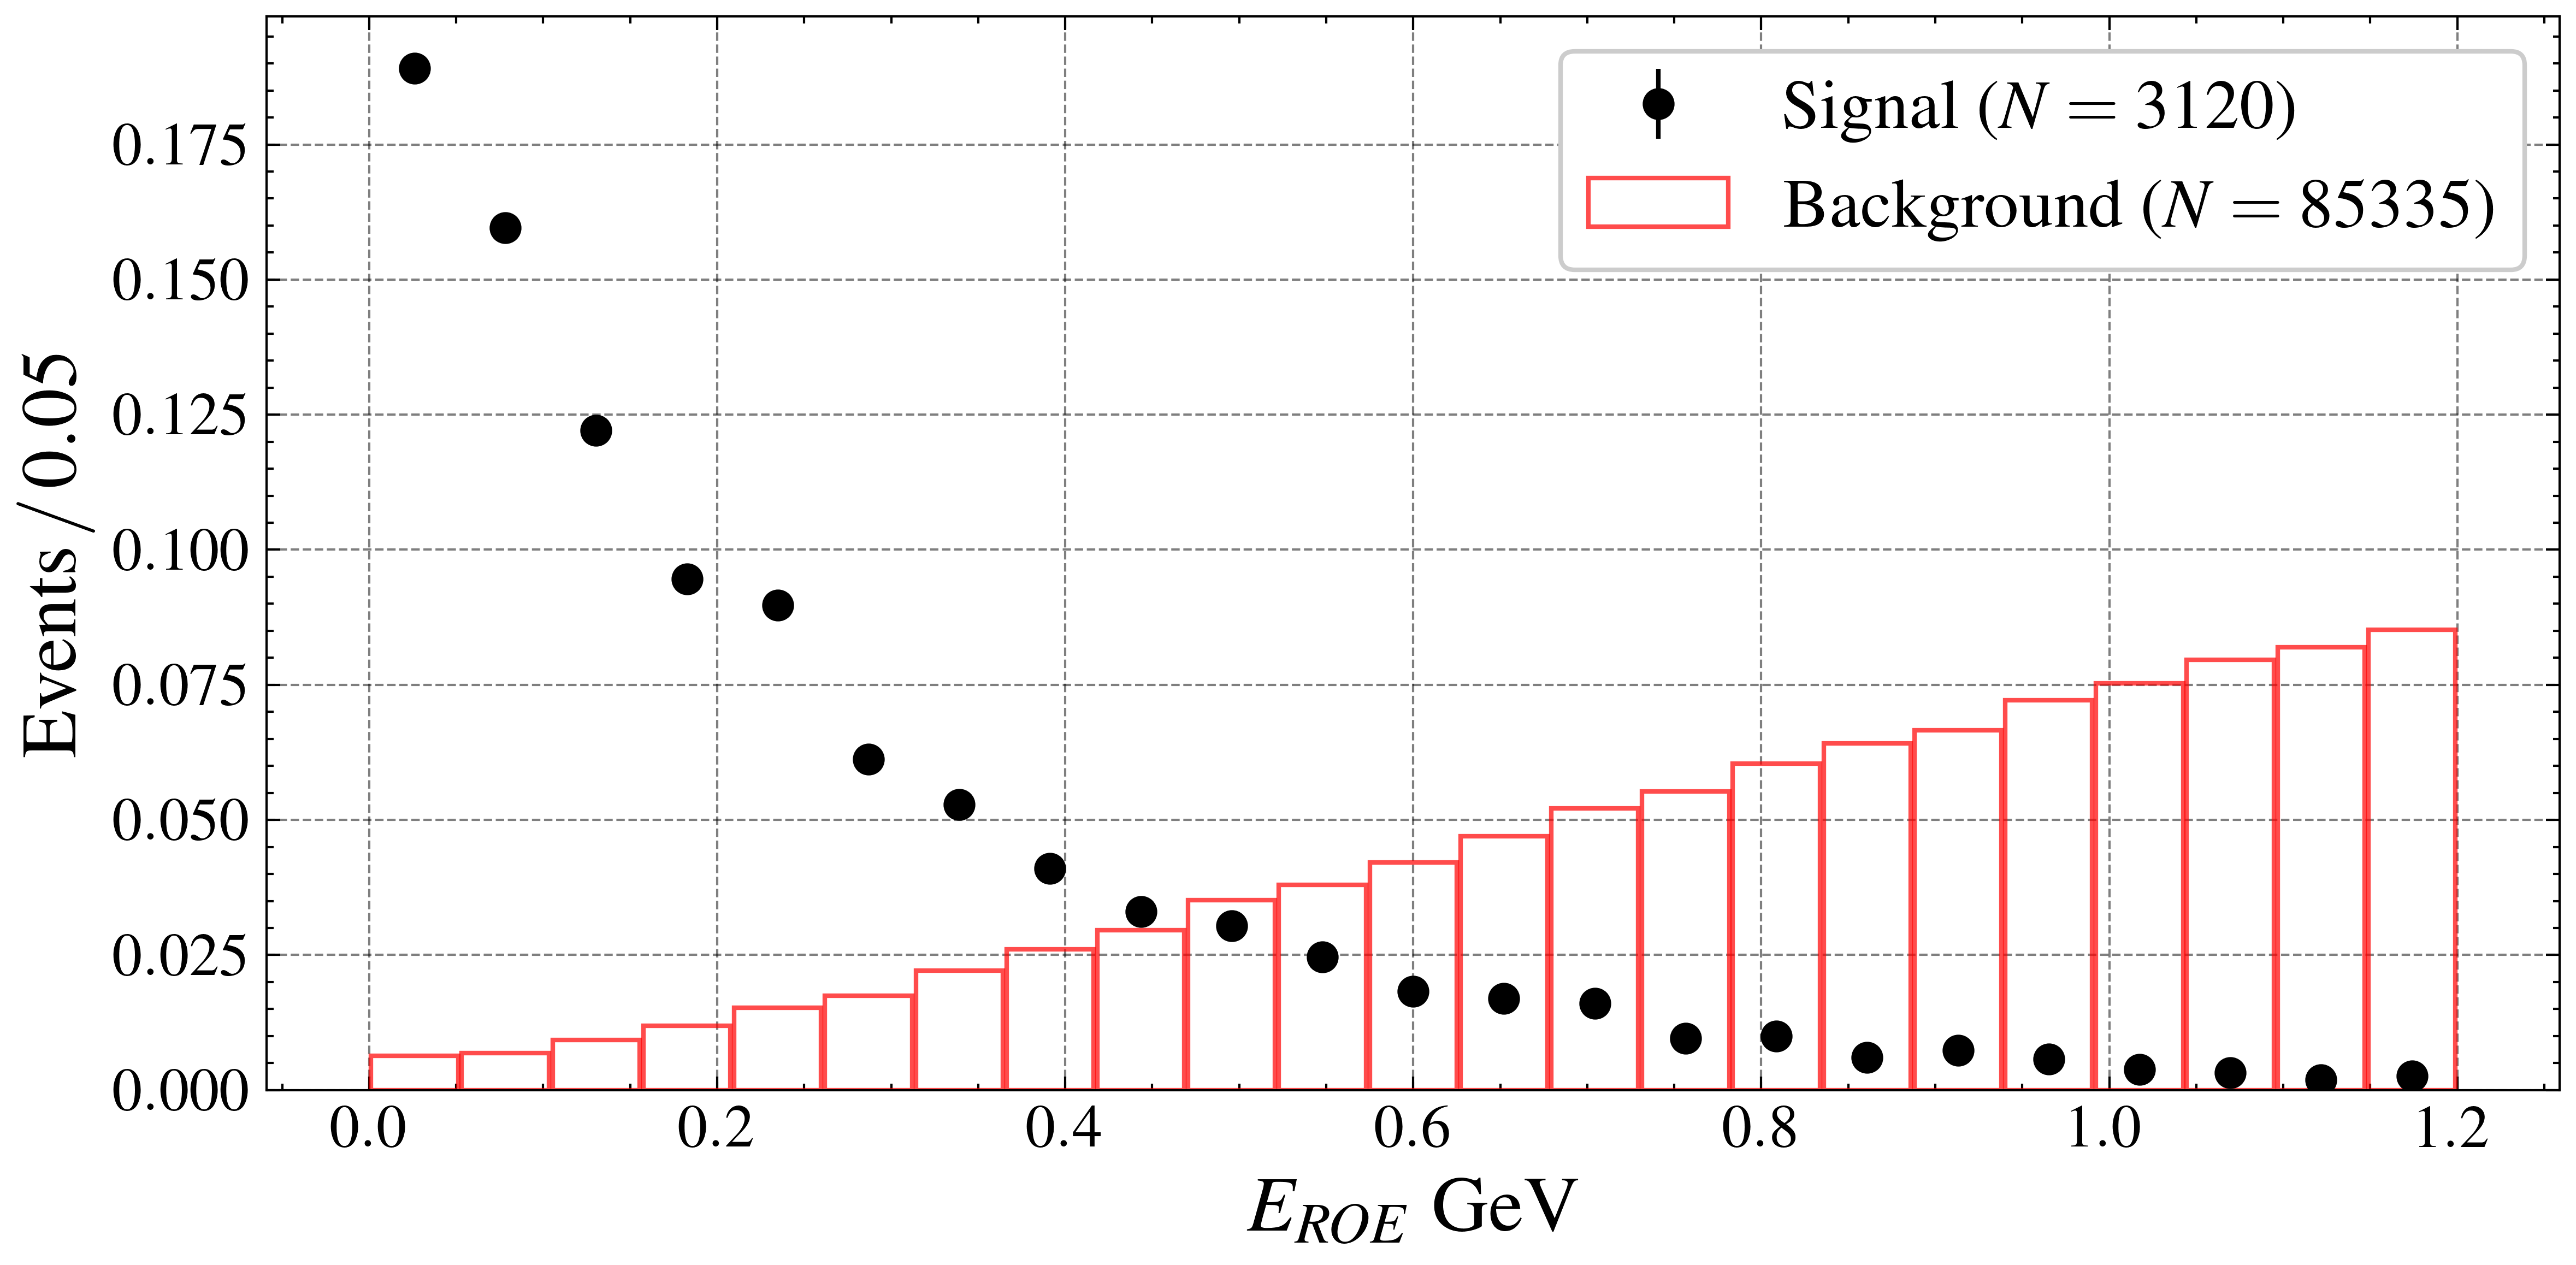

In [320]:
wbin = 0.05
a = 0
b = 1.2
bins = np.linspace(a, b, int((b-a)/wbin + 1))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))



bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "E_gamma_in_ROE",
    filter_mask=mask_sig
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)" )


# Background
bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "E_gamma_in_ROE",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep)/N_lep,
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)


ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$E_{ROE} \ \mathrm{GeV}$')
ax.legend()

plt.tight_layout()
plt.savefig("output/cmpmiss.pdf")
plt.show()

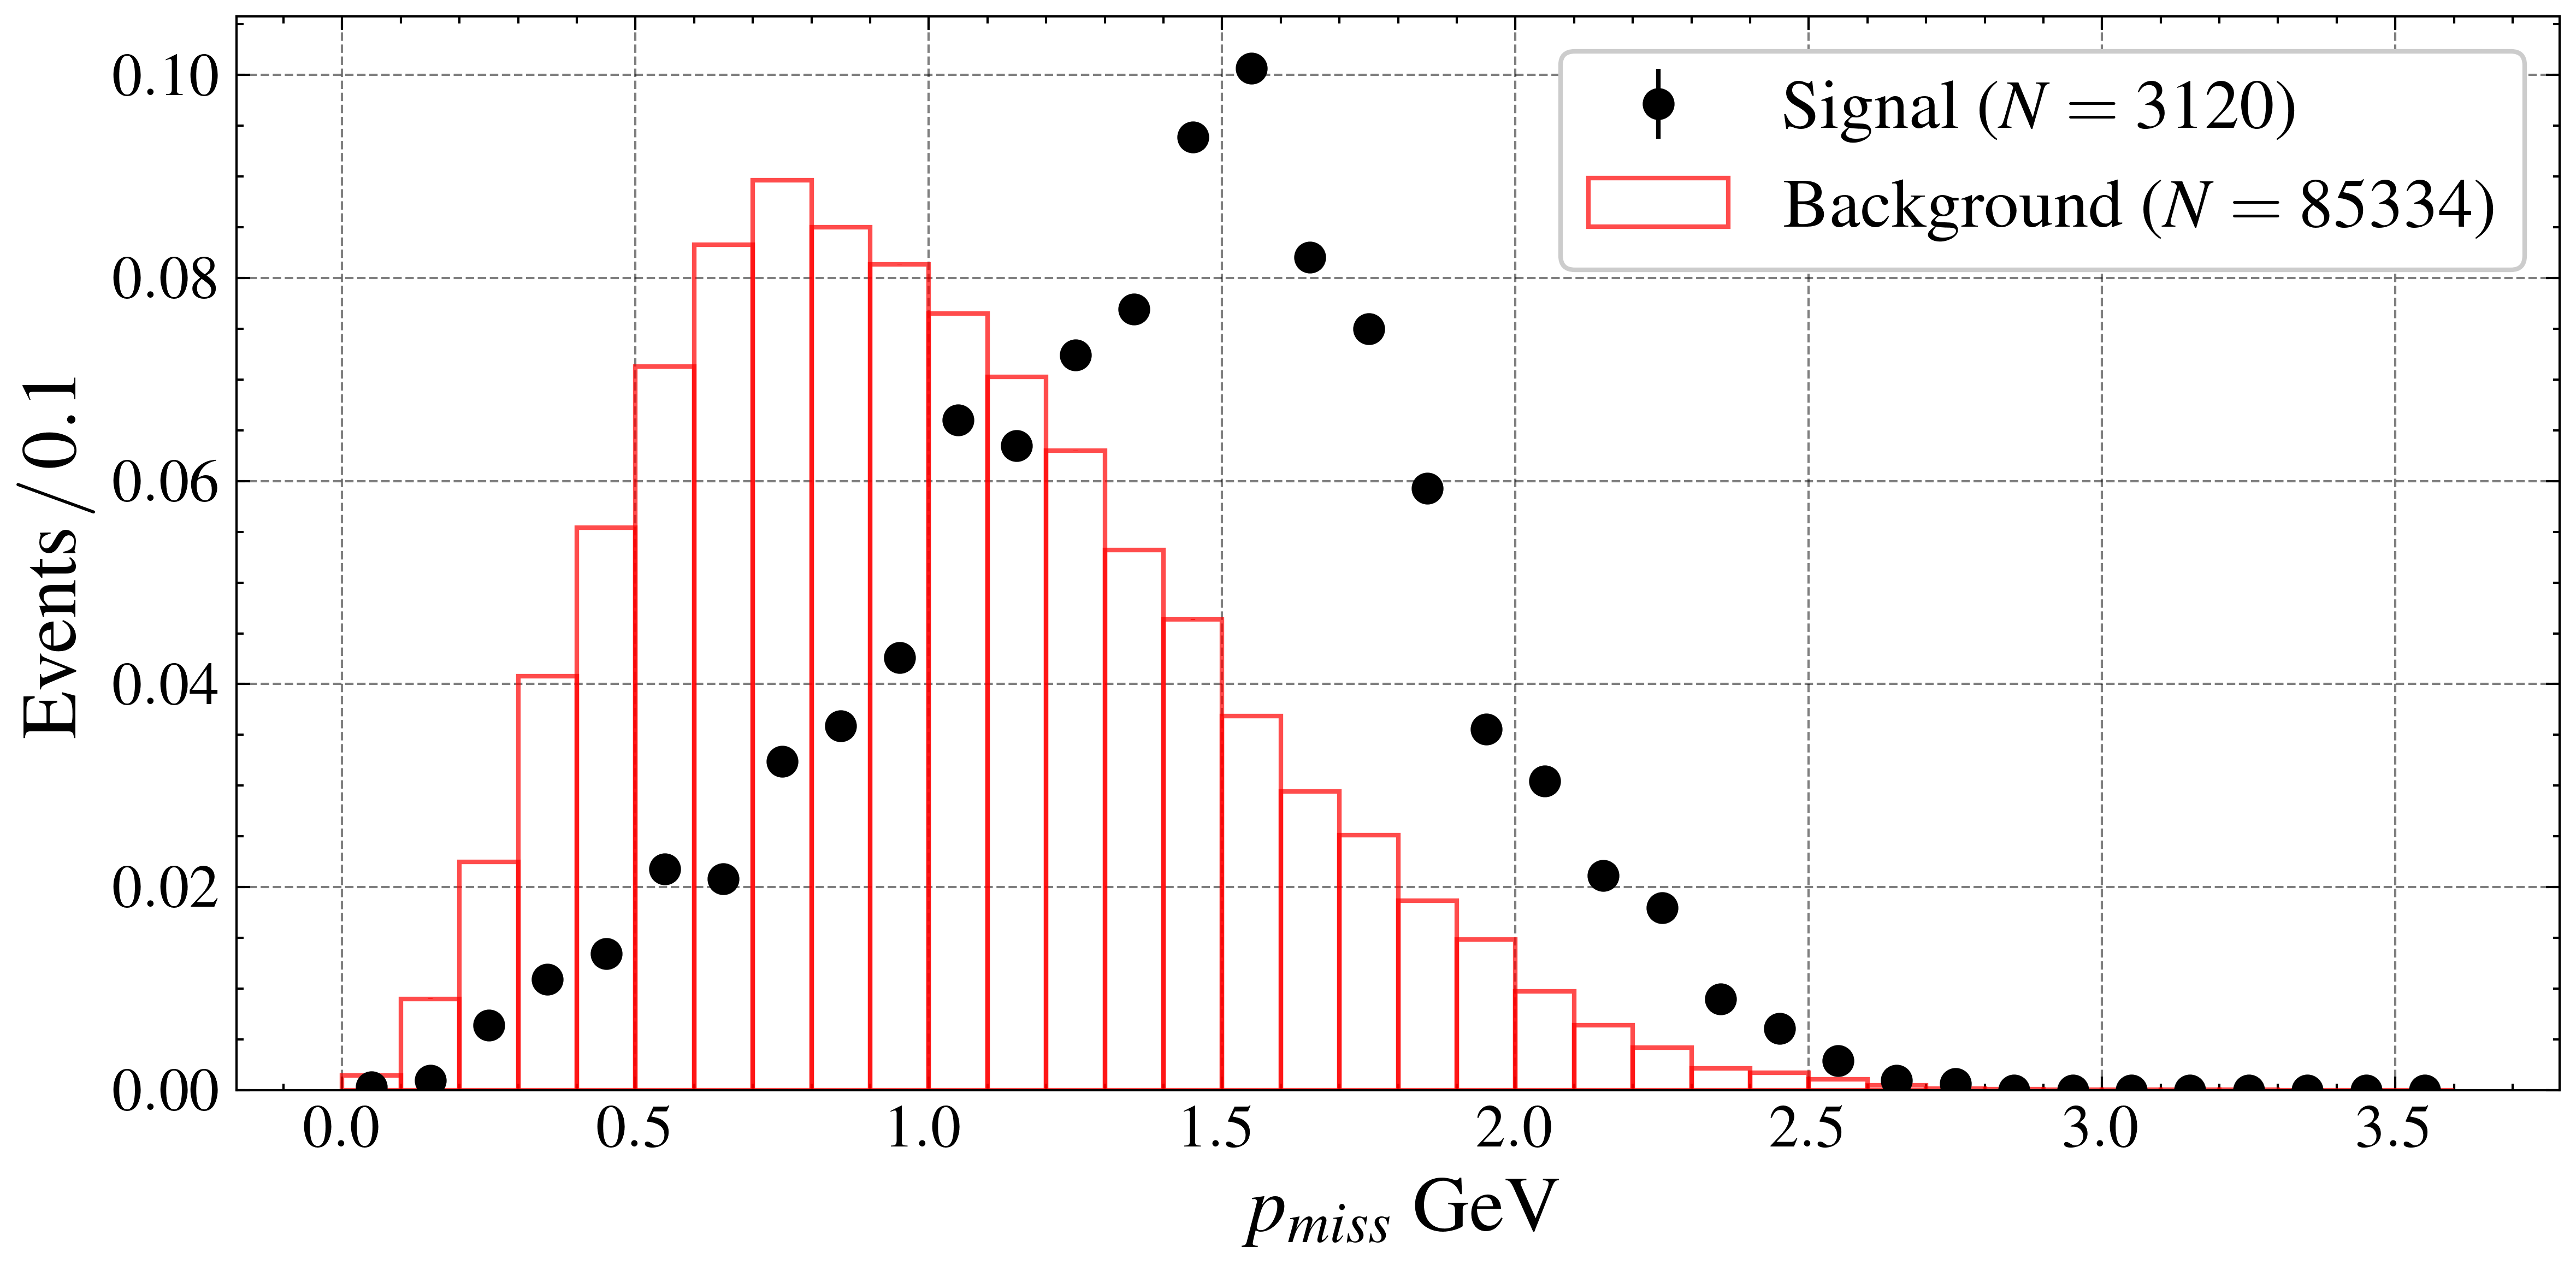

In [321]:
wbin = 0.1
a = 0
b = 3.6
bins = np.linspace(a, b, int((b-a)/wbin + 1))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))



bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "cmpmiss",
    filter_mask=mask_sig
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)" )


# Background
bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "cmpmiss",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep)/N_lep,
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)


ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$p_{miss} \ \mathrm{GeV}$')
ax.legend()

plt.tight_layout()
plt.savefig("output/cmpmiss.pdf")
plt.show()

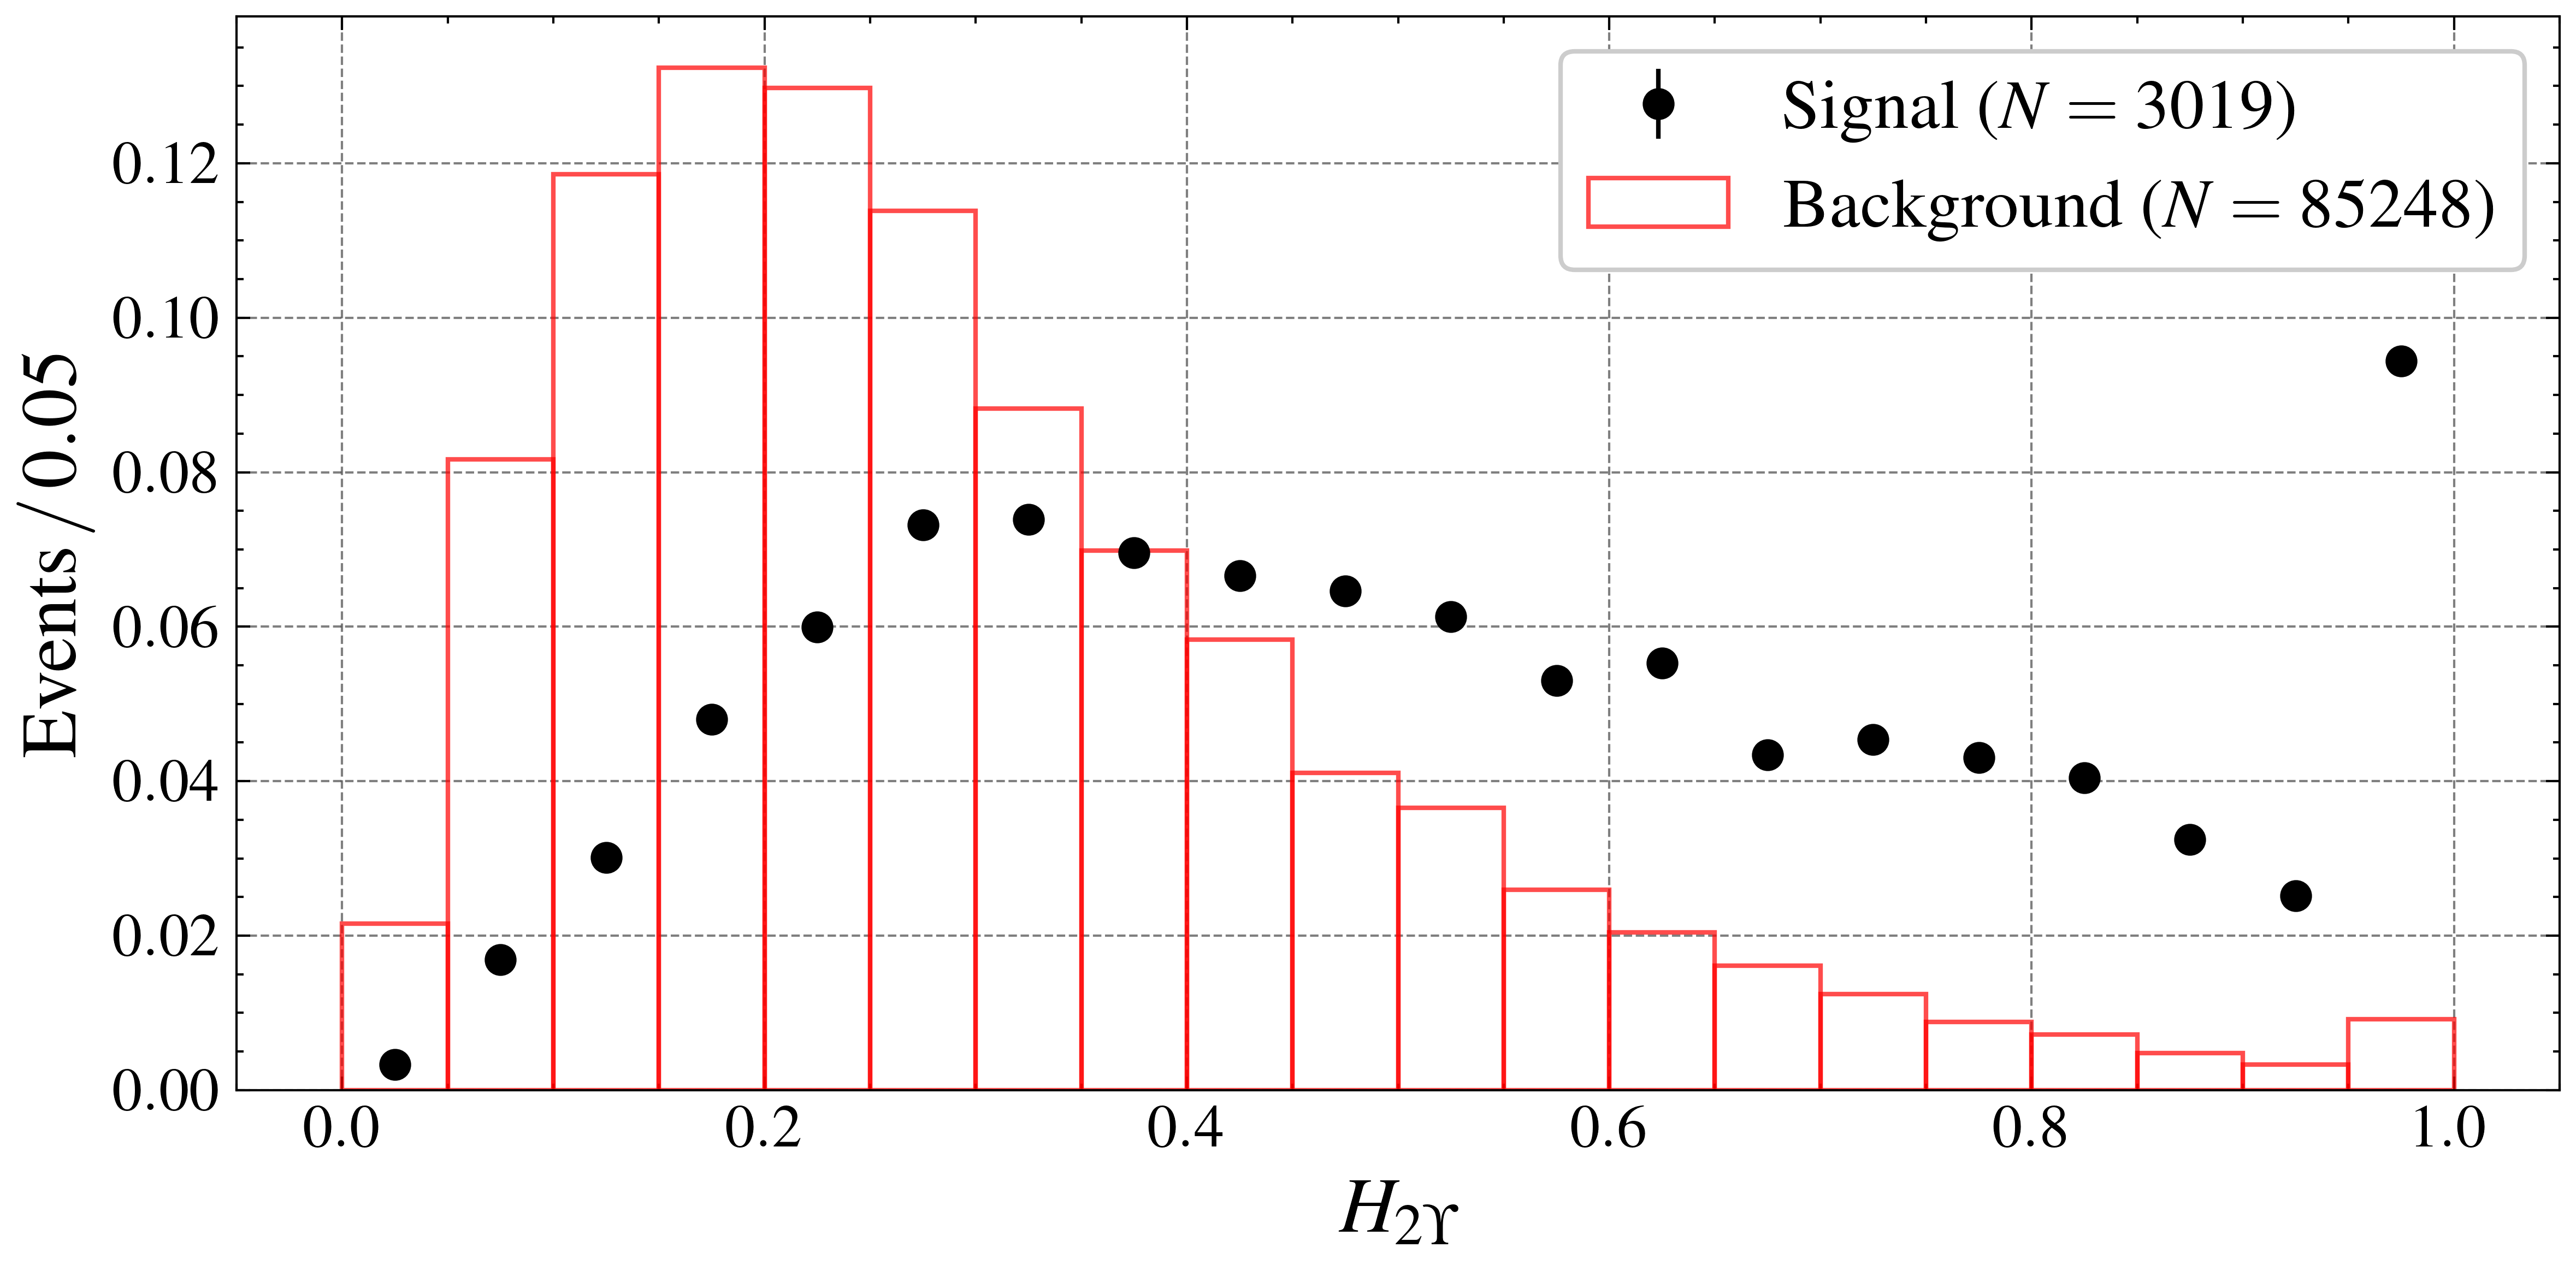

In [322]:
wbin = 0.05
a = 0
b = 1
bins = np.linspace(a, b, int((b-a)/wbin + 1))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))



bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "fox_ups",
    filter_mask=mask_sig
)
errordot(counts_sig, bins=bins, density=True , color=colors[0], label=f"Signal ($N = {N_sig}$)", )


# Background
bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "fox_ups",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep)/N_lep,
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)


ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$H_{2 \Upsilon}$')
ax.legend()

plt.tight_layout()
#plt.savefig("output/cmpmiss.pdf")
plt.show()

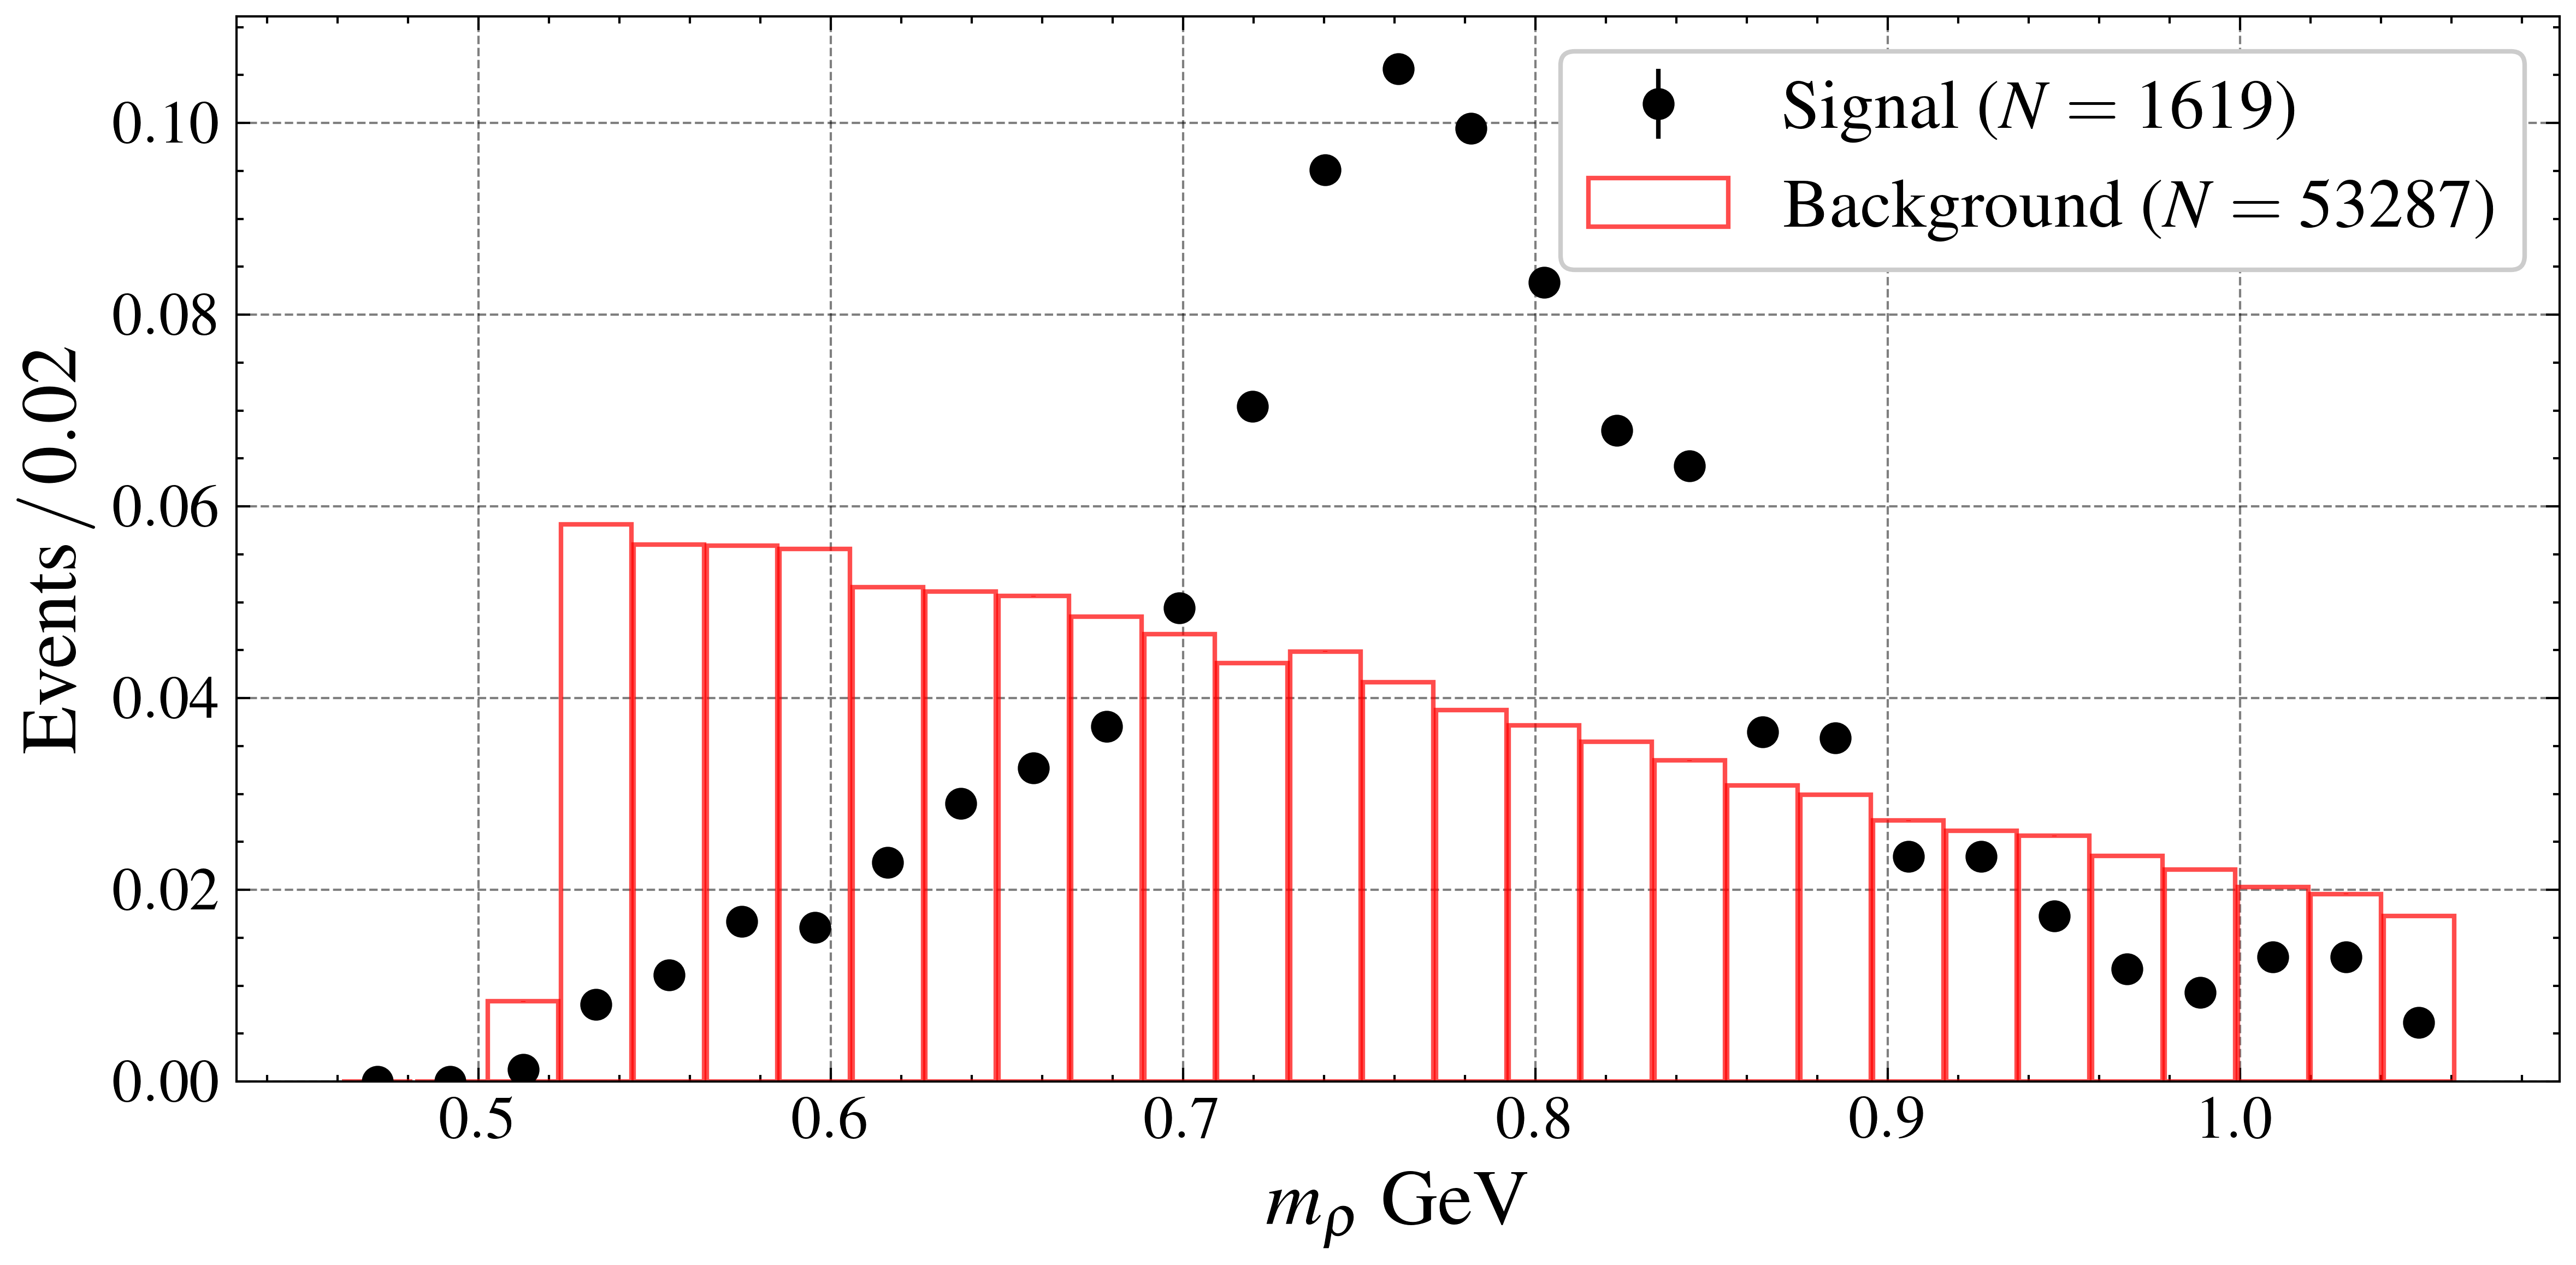

In [323]:
wbin = 0.02
pname = "rho"
M_dts = {"pi": 0.138, "rho": 0.761}
M_sigm = {"pi": 0.02, "rho": 0.3}
M_wg = {"pi": 0.001, "rho": 0.02}
a = M_dts[pname] - M_sigm[pname]
b = M_dts[pname] + M_sigm[pname]
bins = np.linspace(a, b, int((b-a)/M_wg[pname] + 1))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))



bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "tau_d_0_0",
    filter_mask=mask_sig
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)", )


# Background
bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "tau_d_0_0",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep)/N_lep,
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)


ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(rf'$m_{{\{pname}}} \ \mathrm{{GeV}}$')
ax.legend()

plt.tight_layout()
plt.show()

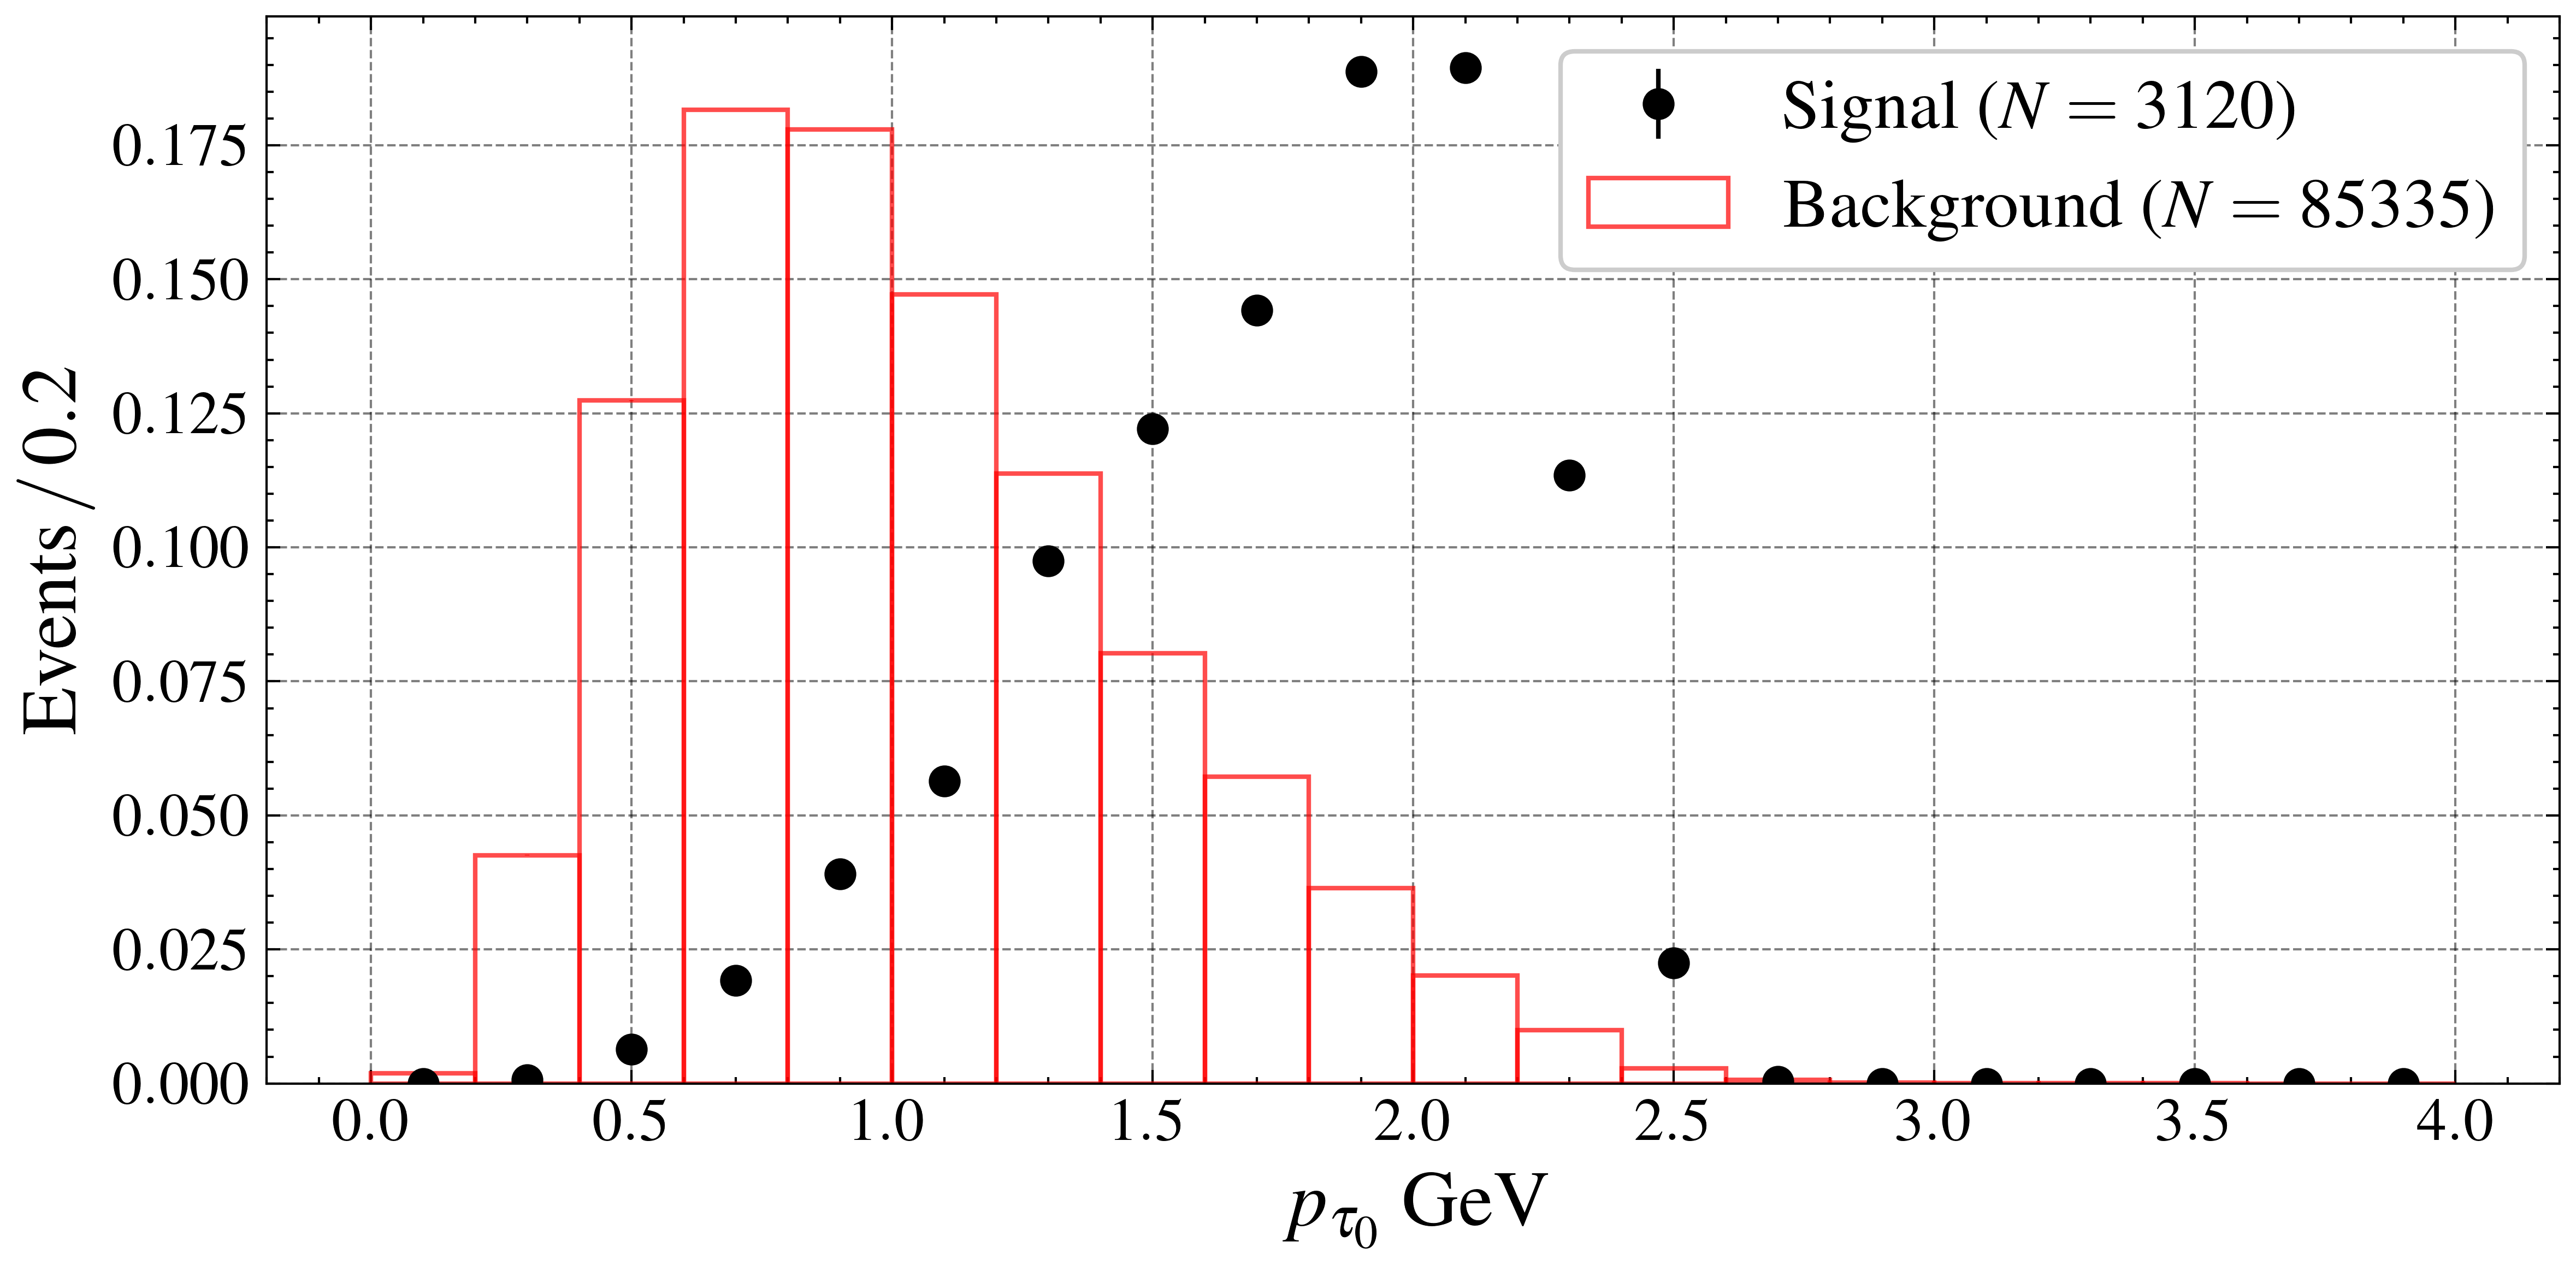

In [324]:
wbin = 0.2
a = 0
b = 4
bins = np.linspace(a, b, int((b-a)/wbin + 1))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))



bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "p_tau_0",
    filter_mask=mask_sig
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)", )


# Background
bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "p_tau_0",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep)/N_lep,
    width=wbin, align='center',
    fill = False, alpha = 0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$p_{\tau_0} \ \mathrm{GeV}$')
ax.legend()

plt.savefig("output/p_tau_0.pdf")
plt.tight_layout()
plt.show()

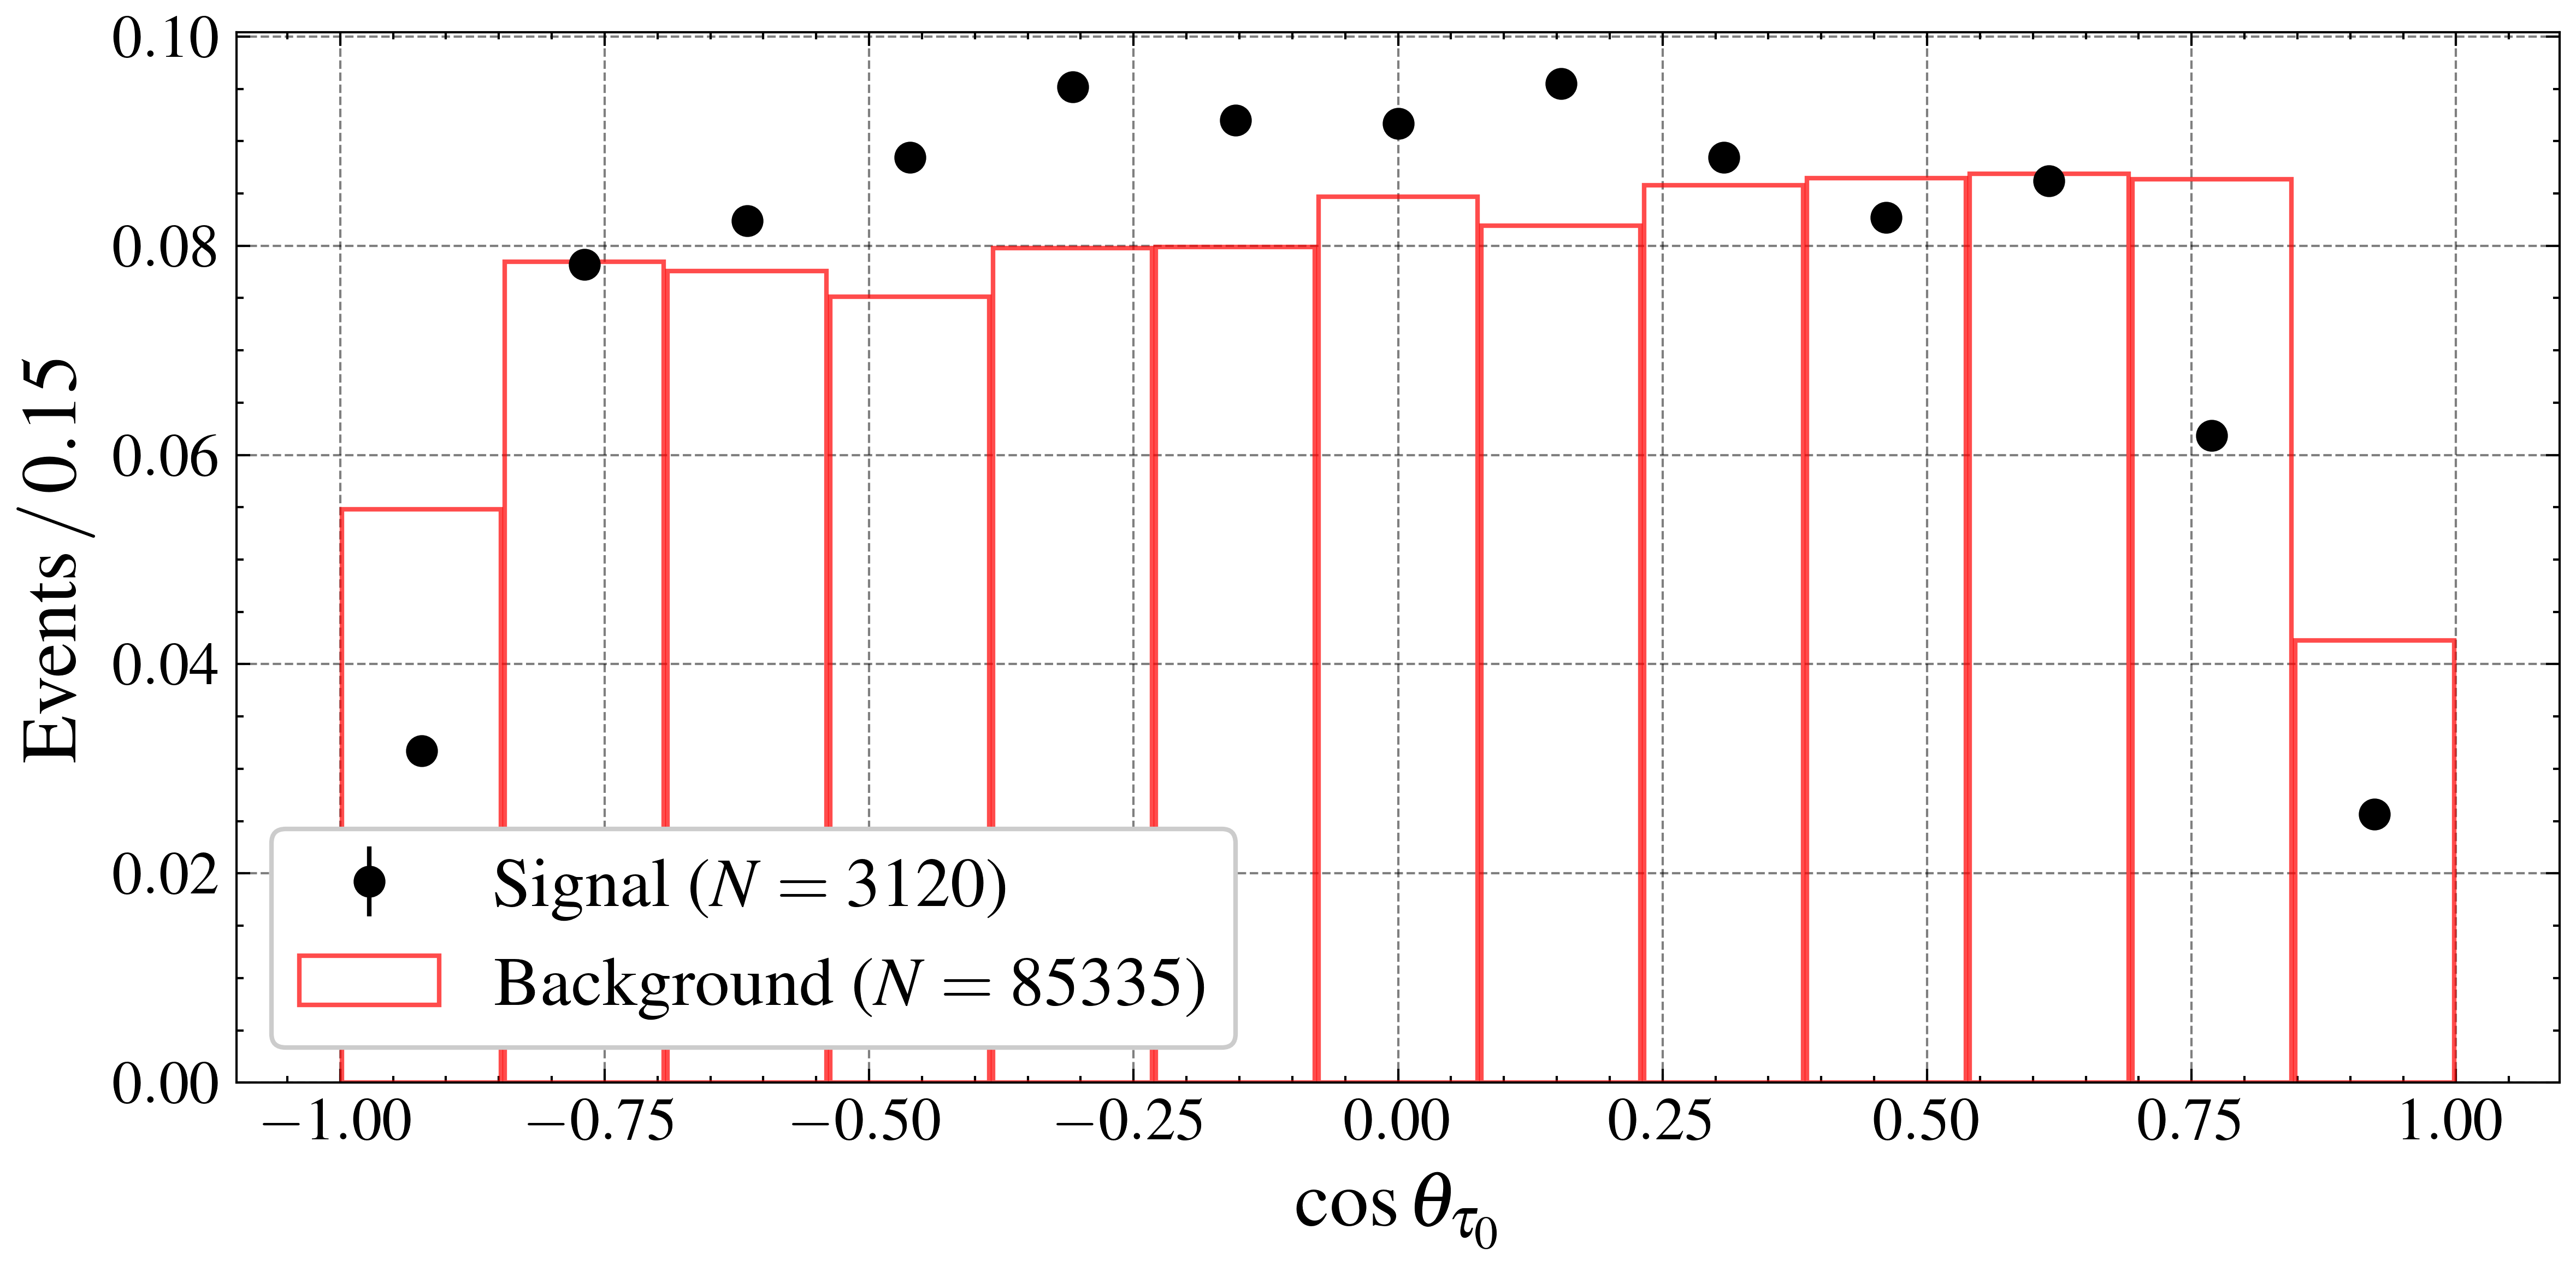

In [325]:
wbin = 0.15
a = -1
b = 1
bins = np.linspace(a, b, int((b - a) / wbin + 1))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

# Signal
bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "theta_tau_0",
    filter_mask=mask_sig,
    norm=False
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)", axs=ax)

# Background
bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "theta_tau_0",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep) / N_lep,
    width=wbin, align='center',
    fill=False, alpha=0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\cos \theta_{\tau_0}$')
ax.legend()

plt.tight_layout()
plt.show()


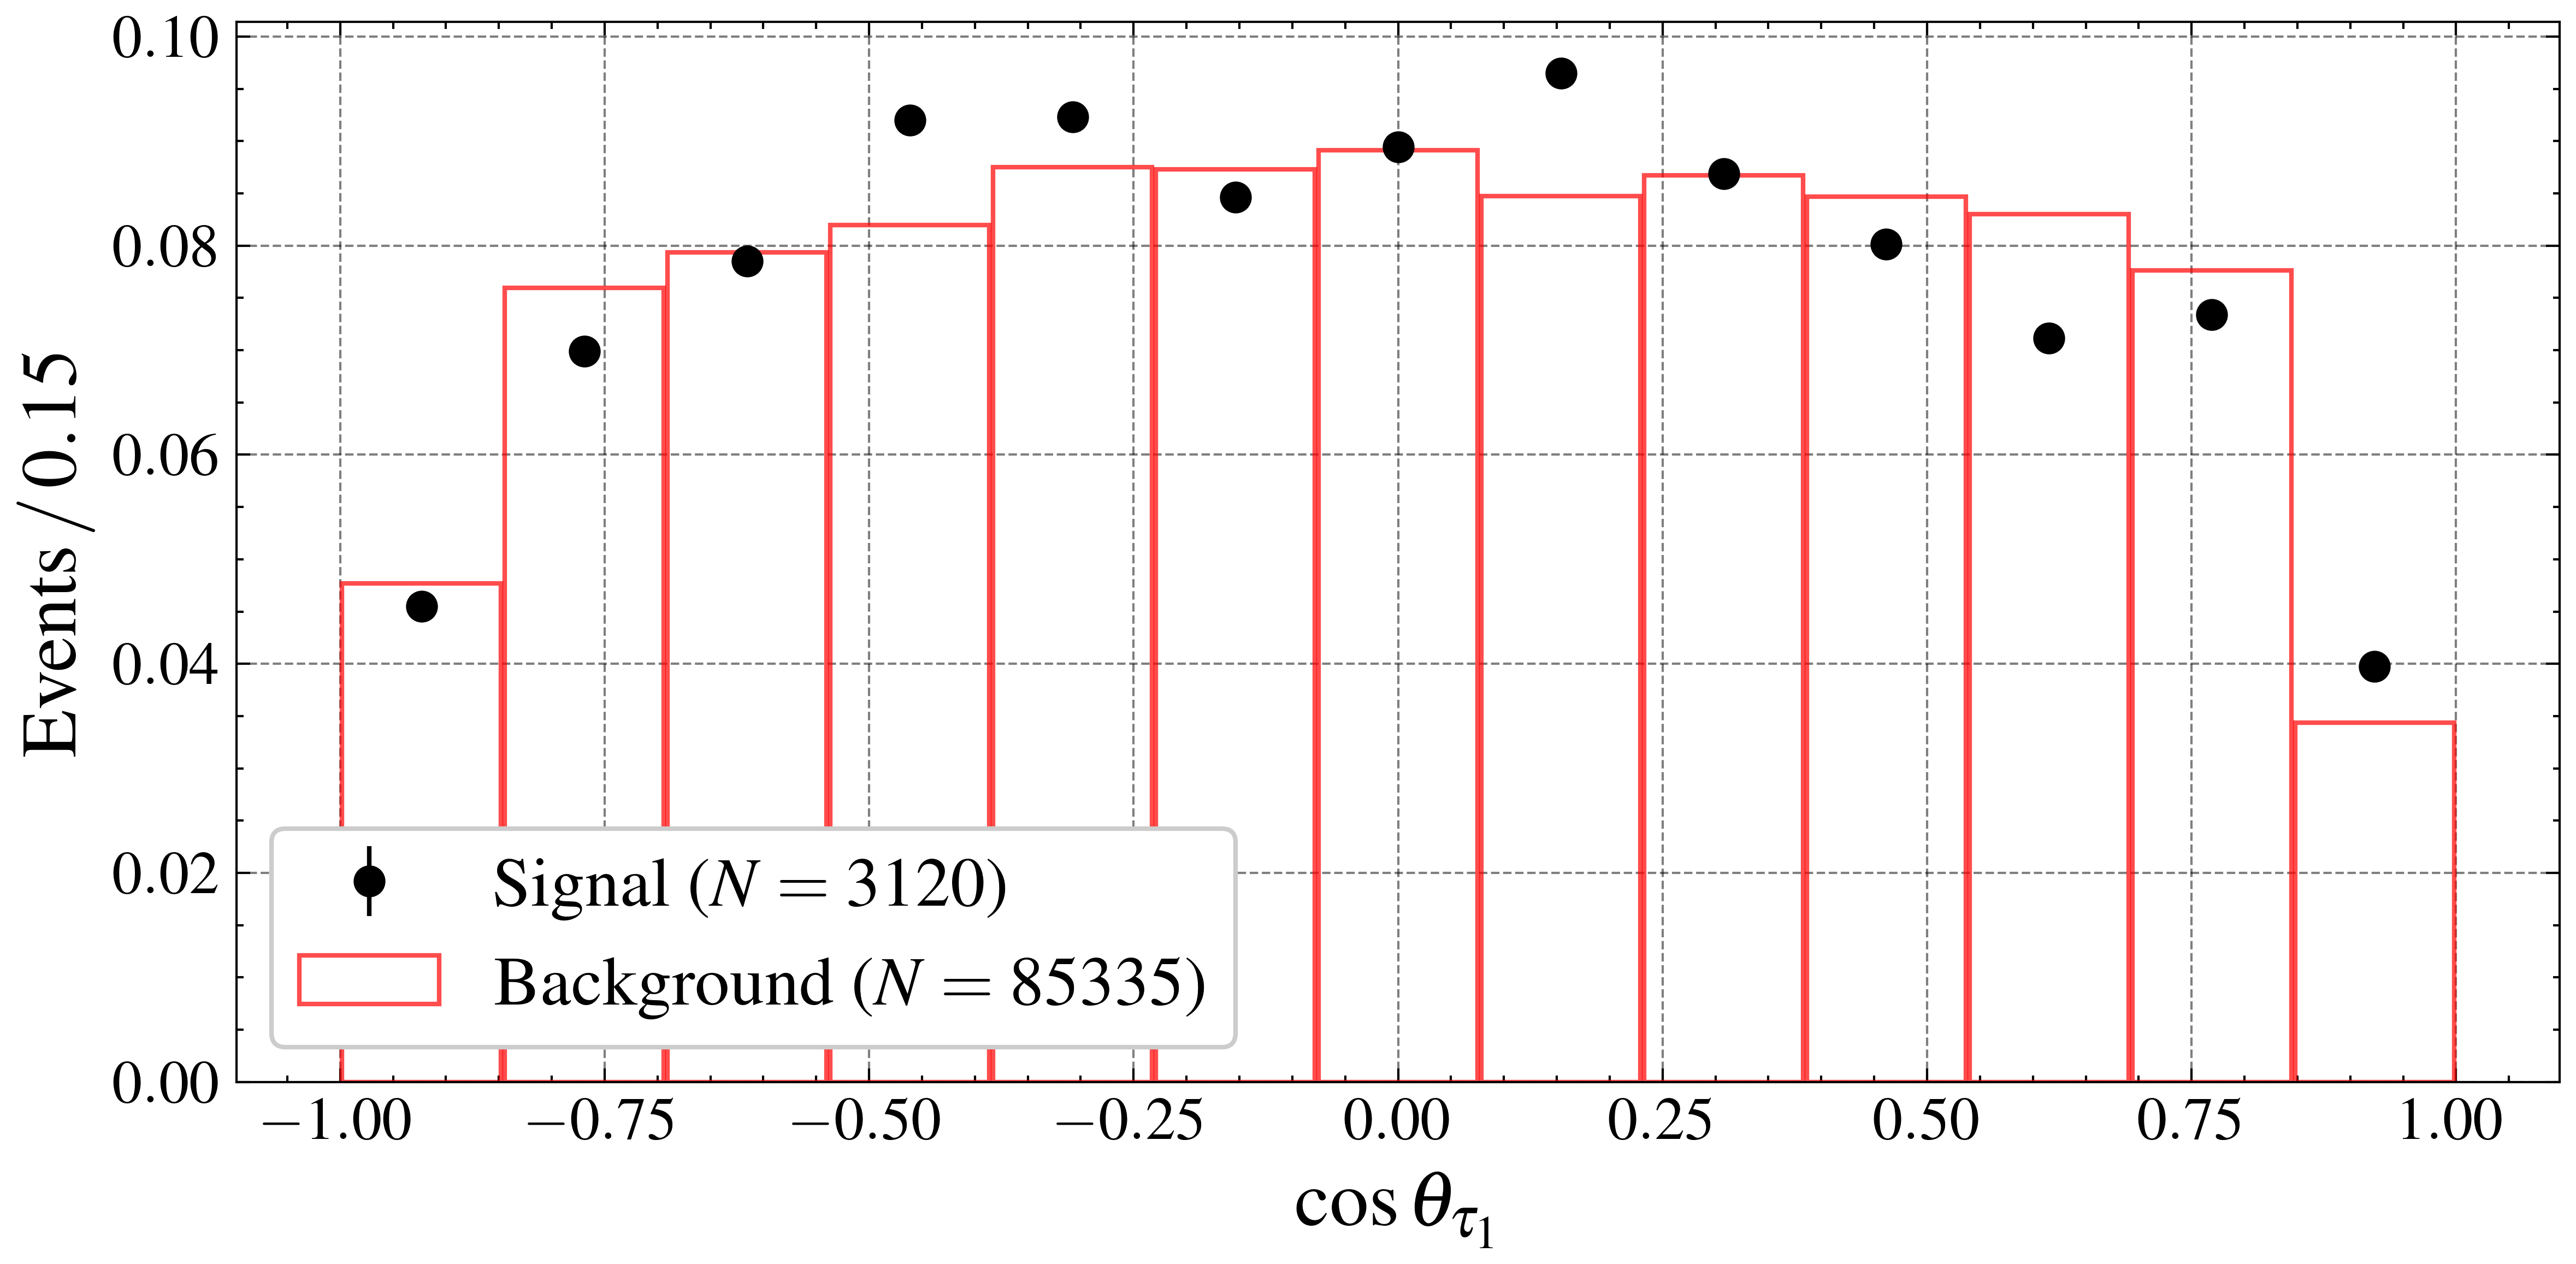

In [326]:
wbin = 0.15
a = -1
b = 1
bins = np.linspace(a, b, int((b - a) / wbin + 1))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

# Signal
bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "theta_tau_1",
    filter_mask=mask_sig,
    norm=False
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)", axs=ax)

# Background
bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "theta_tau_1",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep) / N_lep,
    width=wbin, align='center',
    fill=False, alpha=0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\cos \theta_{\tau_1}$')
ax.legend()

plt.tight_layout()
plt.show()


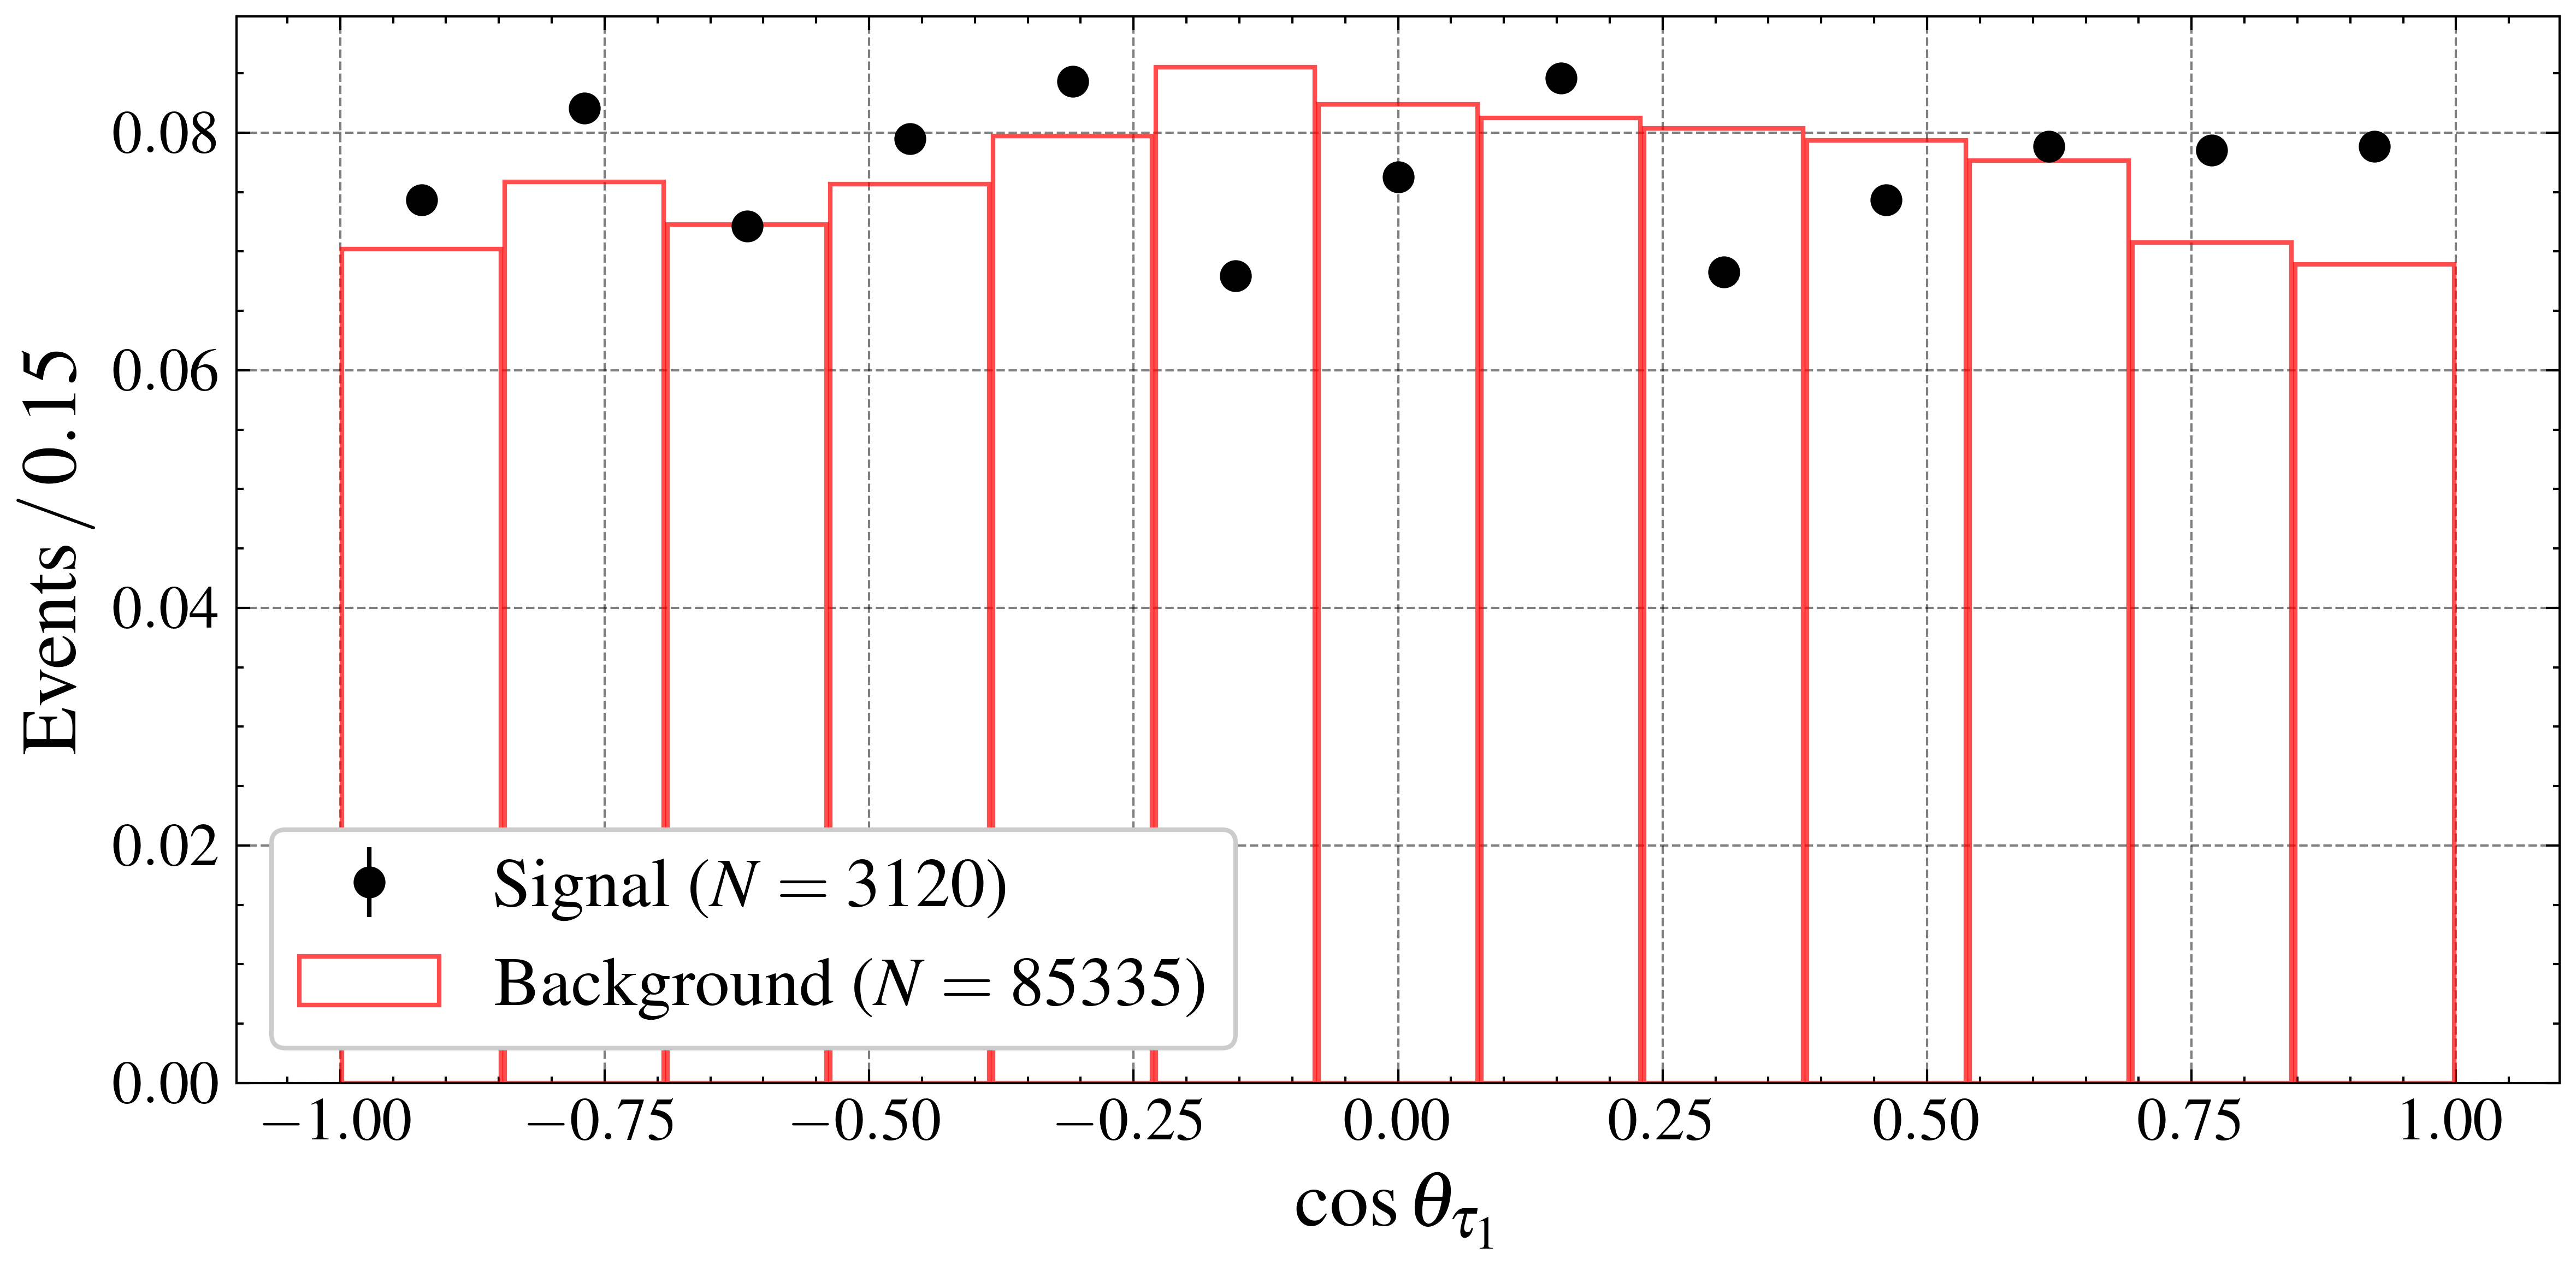

In [327]:
wbin = 0.15
a = -1
b = 1
bins = np.linspace(a, b, int((b - a) / wbin + 1))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

# Signal
bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "theta_Btag",
    filter_mask=mask_sig,
    norm=False
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)", axs=ax)

# Background
bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "theta_Btag",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep) / N_lep,
    width=wbin, align='center',
    fill=False, alpha=0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\cos \theta_{\tau_1}$')
ax.legend()

plt.tight_layout()
plt.show()


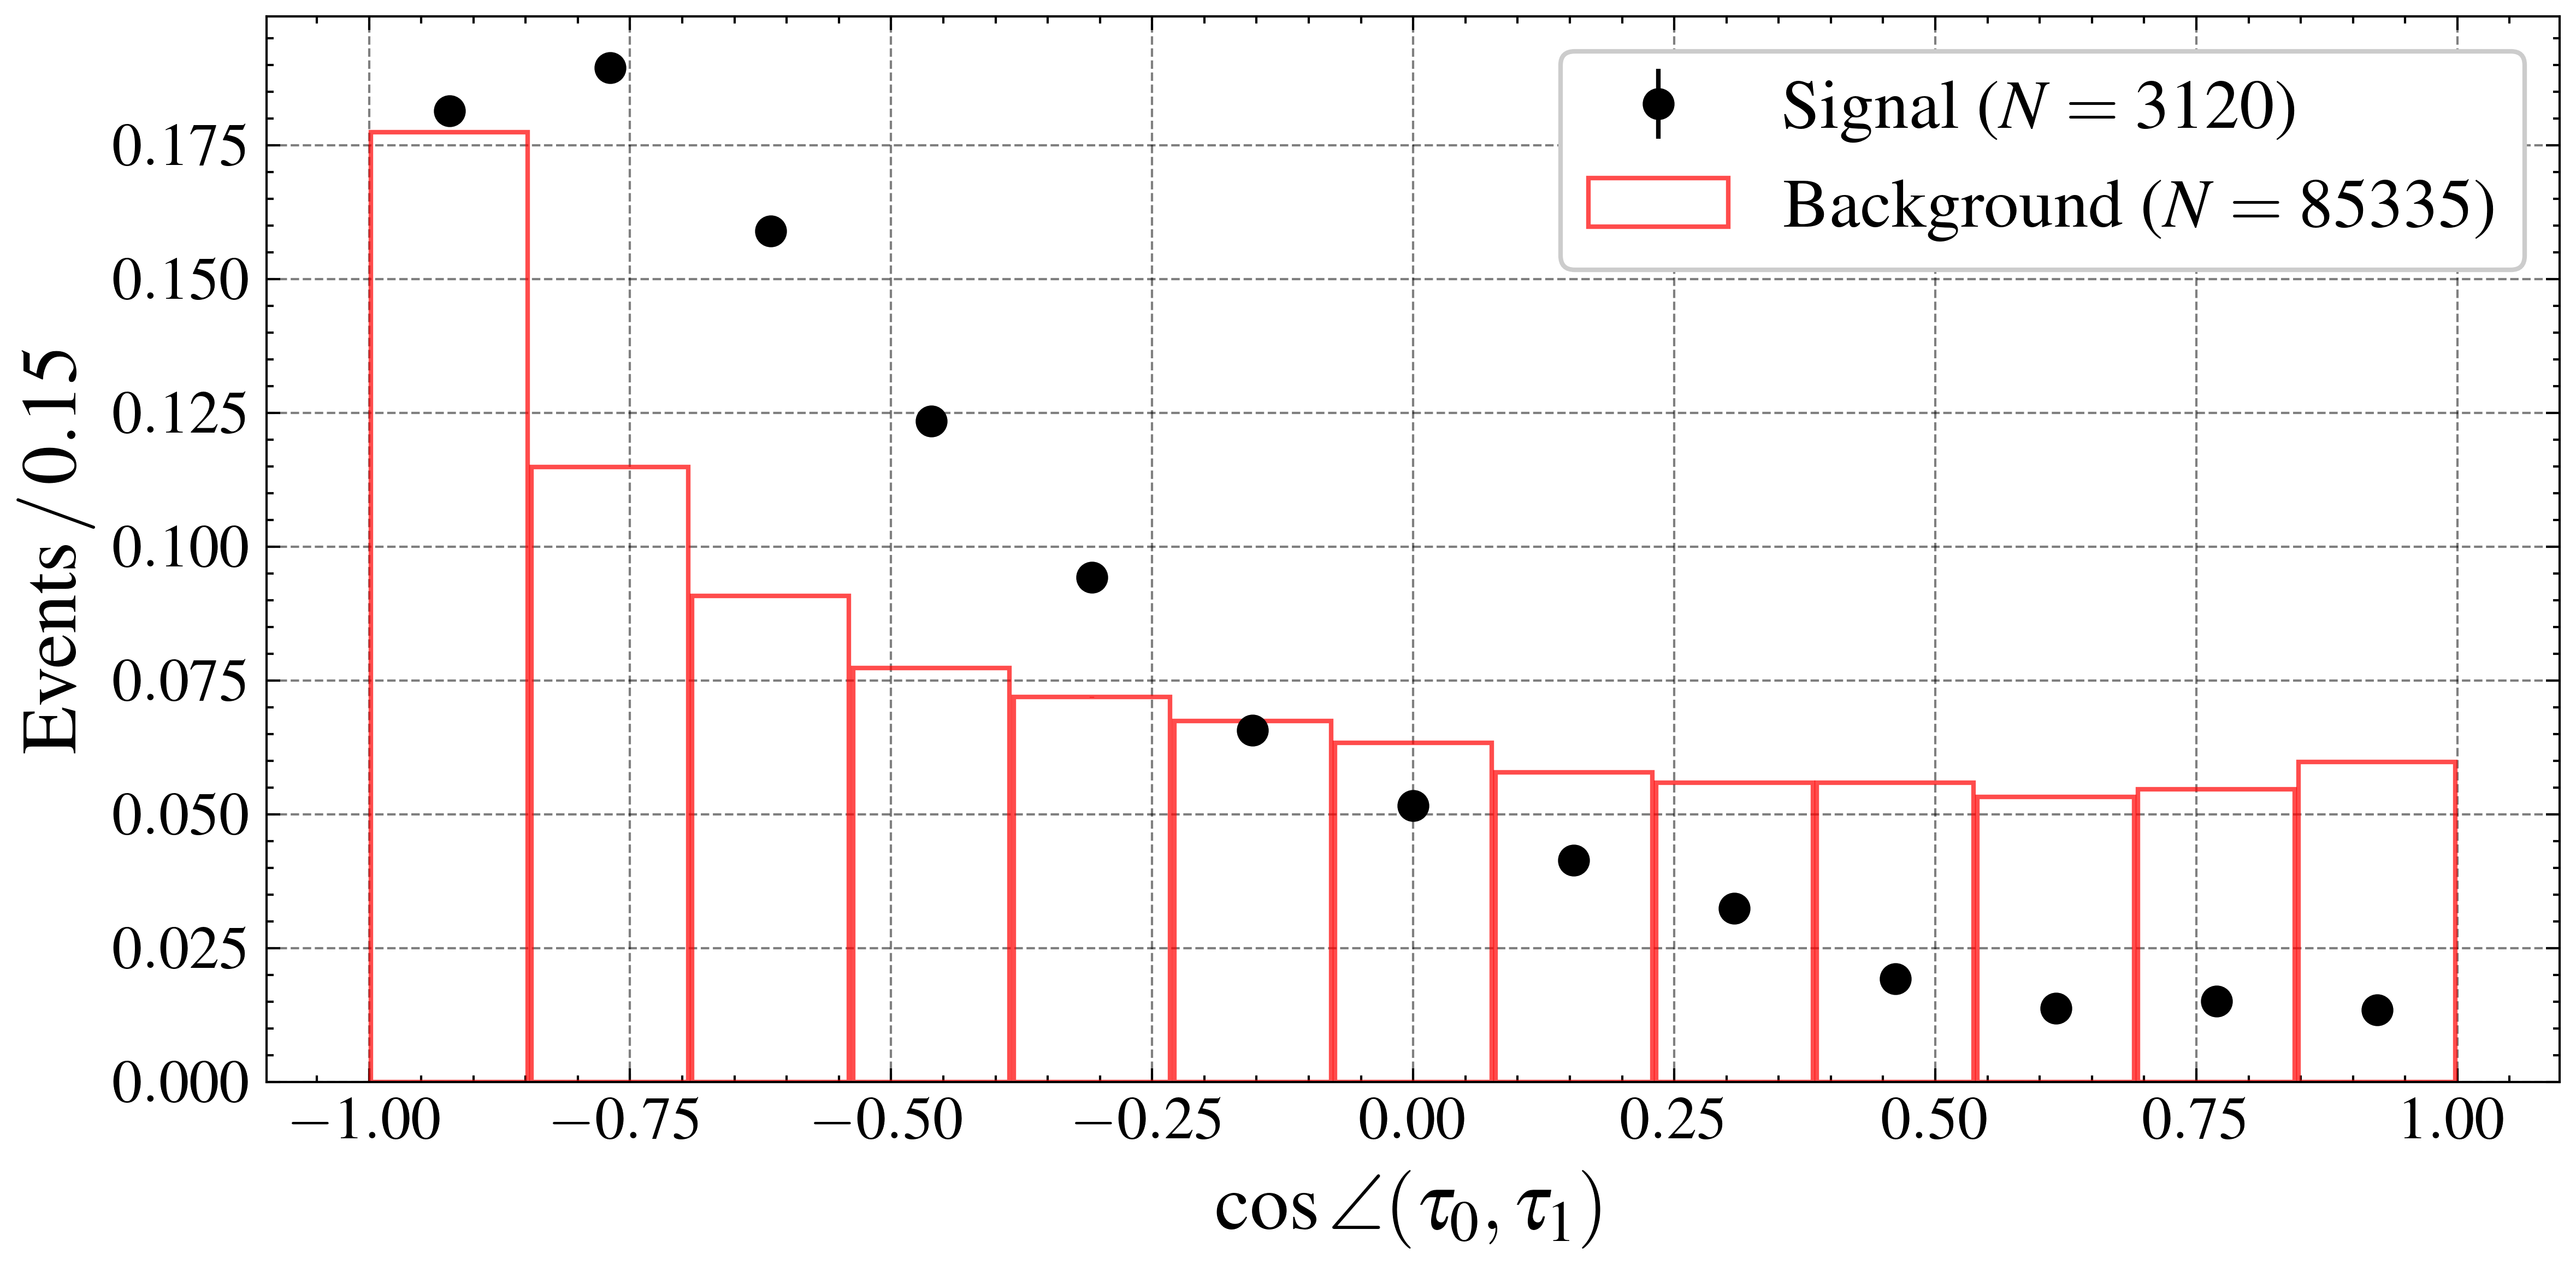

In [328]:
wbin = 0.15
a = -1
b = 1
bins = np.linspace(a, b, int((b - a) / wbin + 1))

fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

# Signal: cos(angle between tau0 and tau1)
bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "ang_taus",
    filter_mask=mask_sig,
    norm=False
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)", axs=ax)

# Background
bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "ang_taus",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep) / N_lep,
    width=wbin, align='center',
    fill=False, alpha=0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\cos \angle(\tau_0, \tau_1)$')
ax.legend()
plt.tight_layout()
plt.savefig("output/ang_taus.pdf")
plt.show()


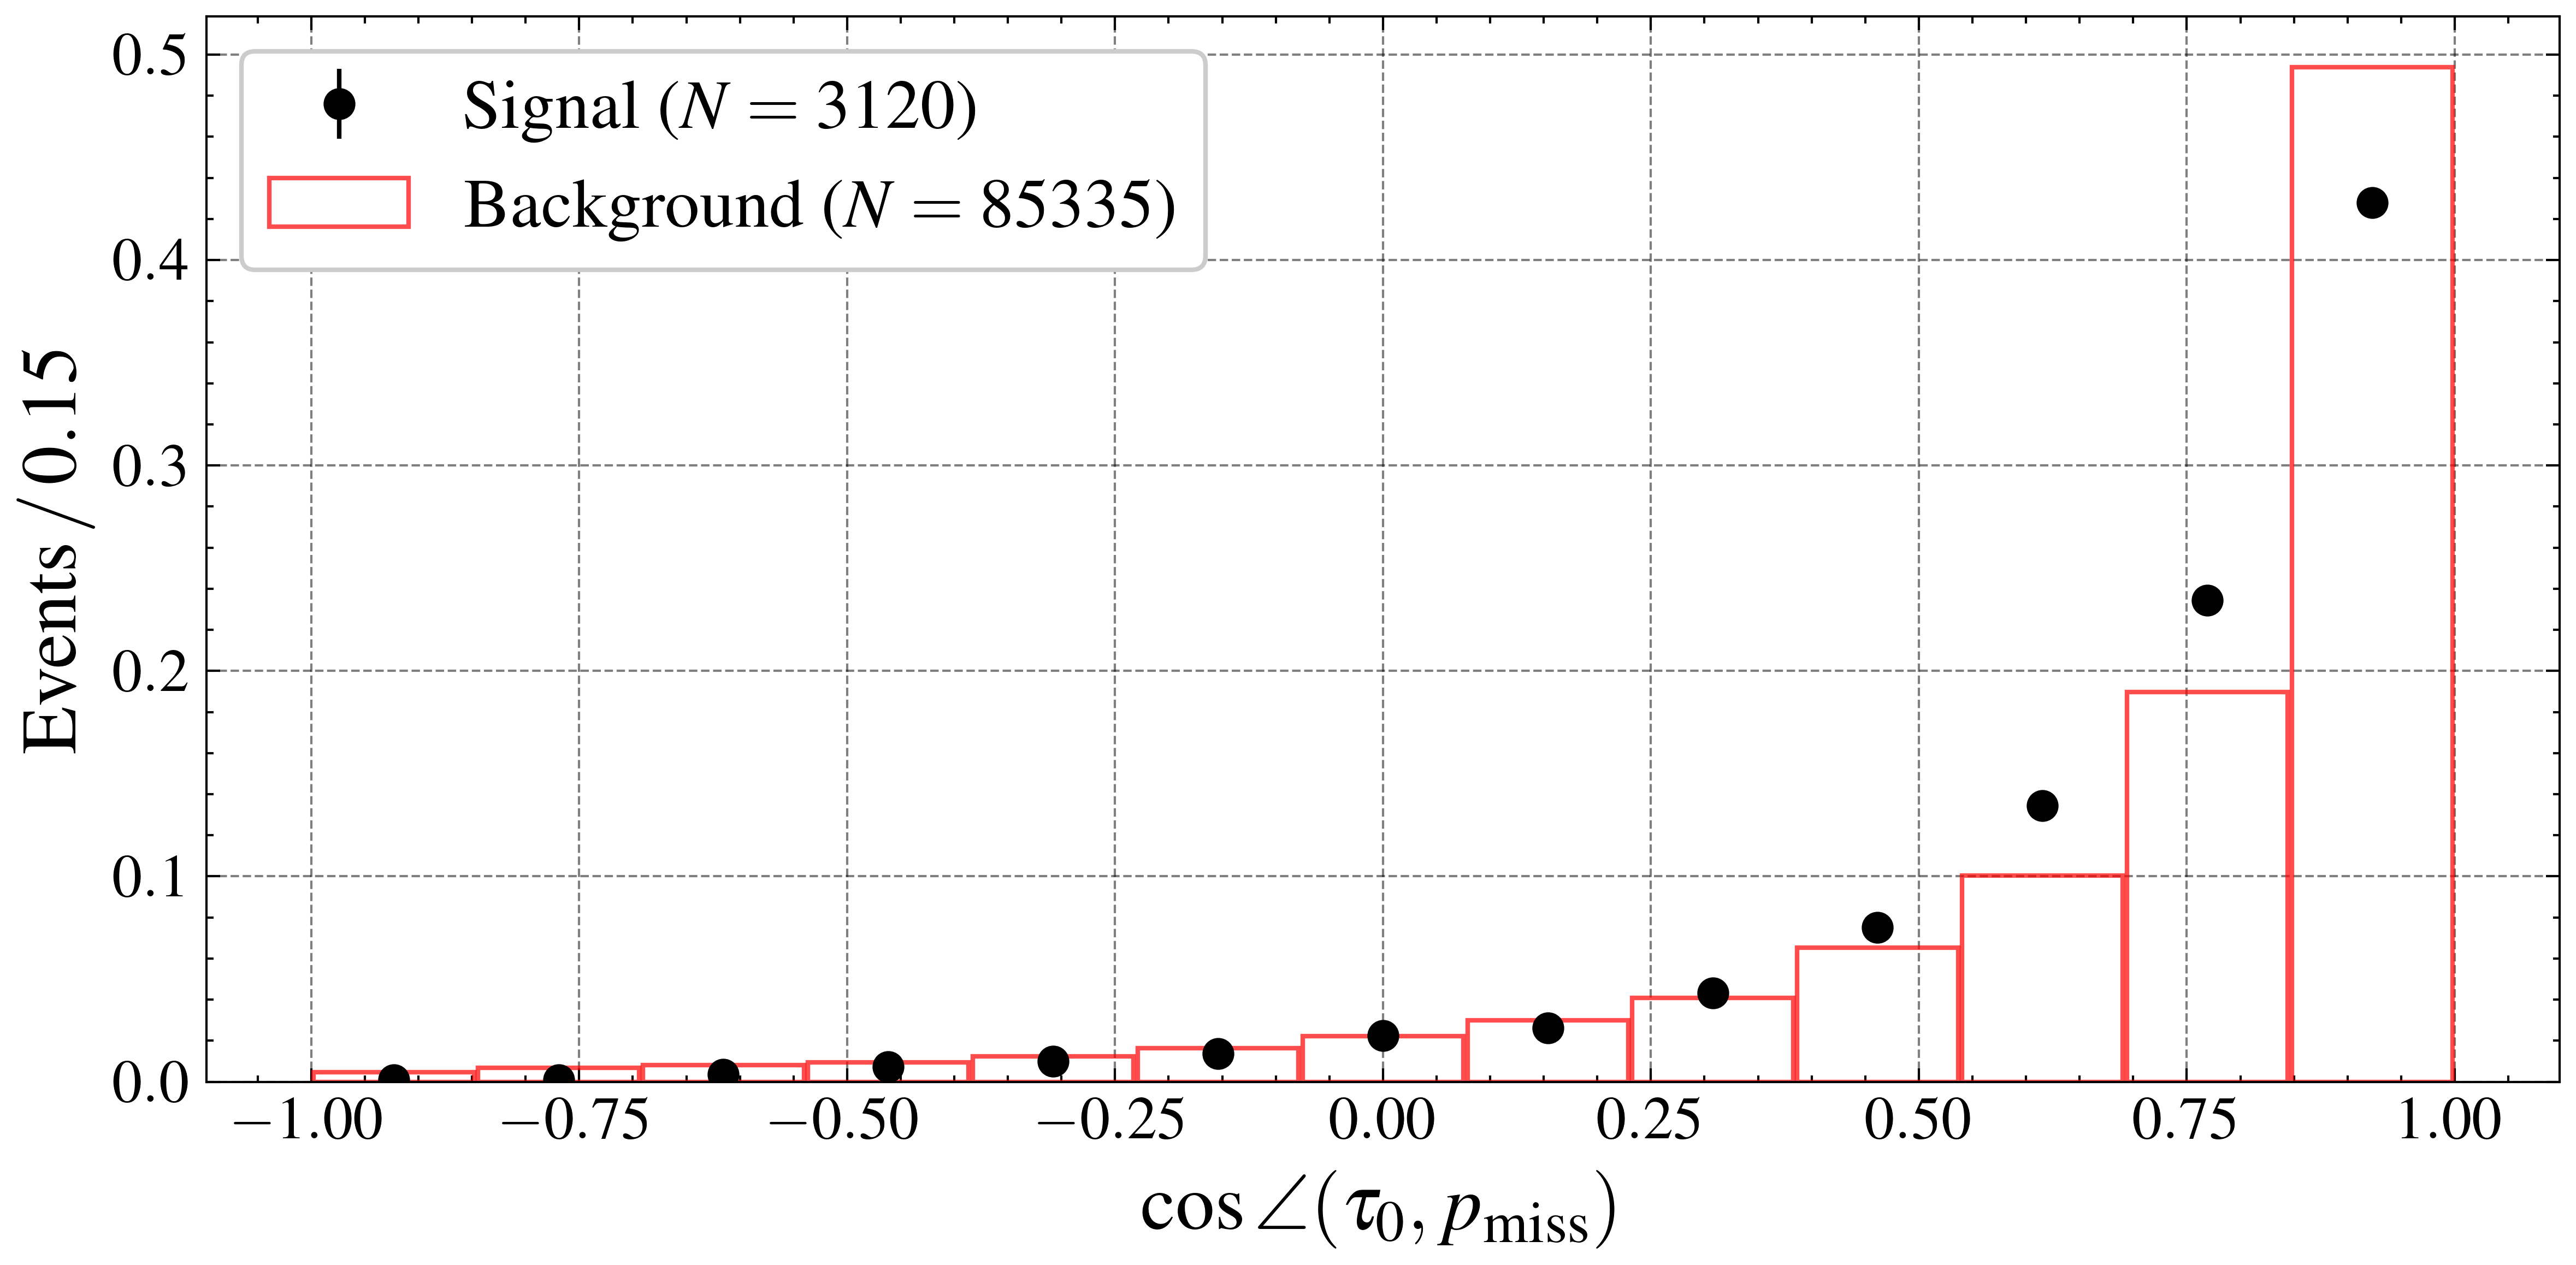

In [329]:
# --- For ang_tau0_pmiss ---
fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "ang_tau0_pmiss",
    filter_mask=mask_sig,
    norm=False
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)", axs=ax)

bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "ang_tau0_pmiss",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep) / N_lep,
    width=wbin, align='center',
    fill=False, alpha=0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\cos \angle(\tau_0, p_\mathrm{miss})$')
ax.legend()
plt.tight_layout()
plt.savefig("output/ang_tau0_pmiss.pdf")
plt.show()


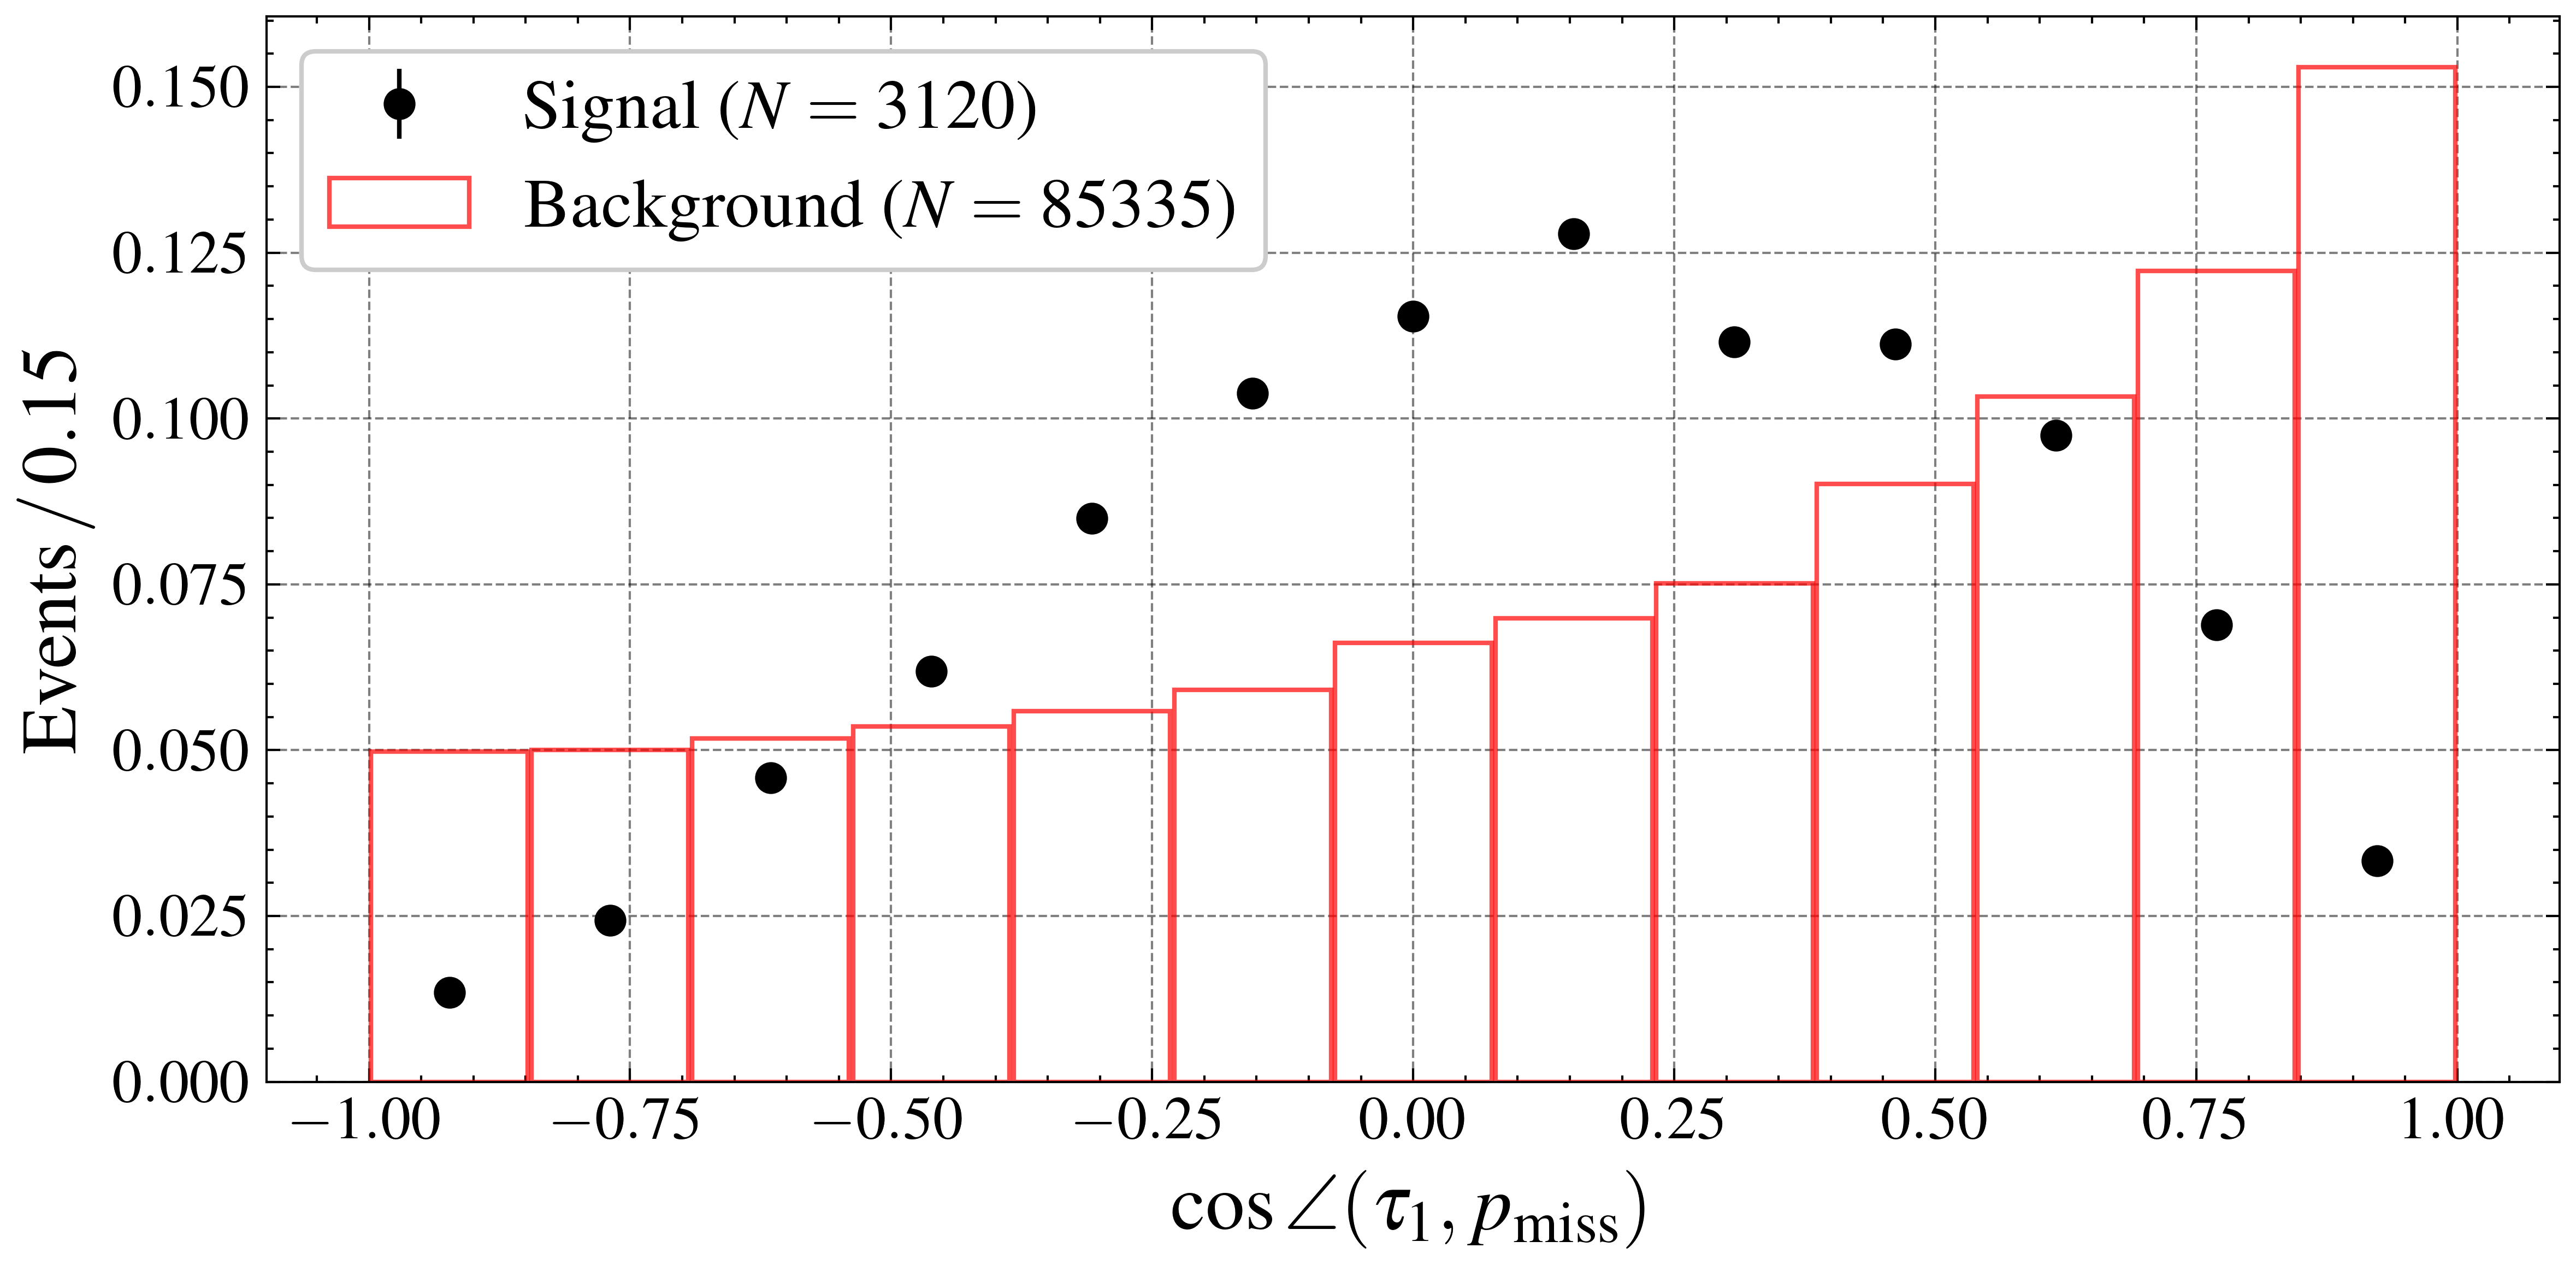

In [330]:
# --- For ang_tau1_pmiss ---
fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "ang_tau1_pmiss",
    filter_mask=mask_sig,
    norm=False
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)", axs=ax)

bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "ang_tau1_pmiss",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep) / N_lep,
    width=wbin, align='center',
    fill=False, alpha=0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\cos \angle(\tau_1, p_\mathrm{miss})$')
ax.legend()
plt.tight_layout()
plt.savefig("output/ang_tau1_pmiss.pdf")
plt.show()


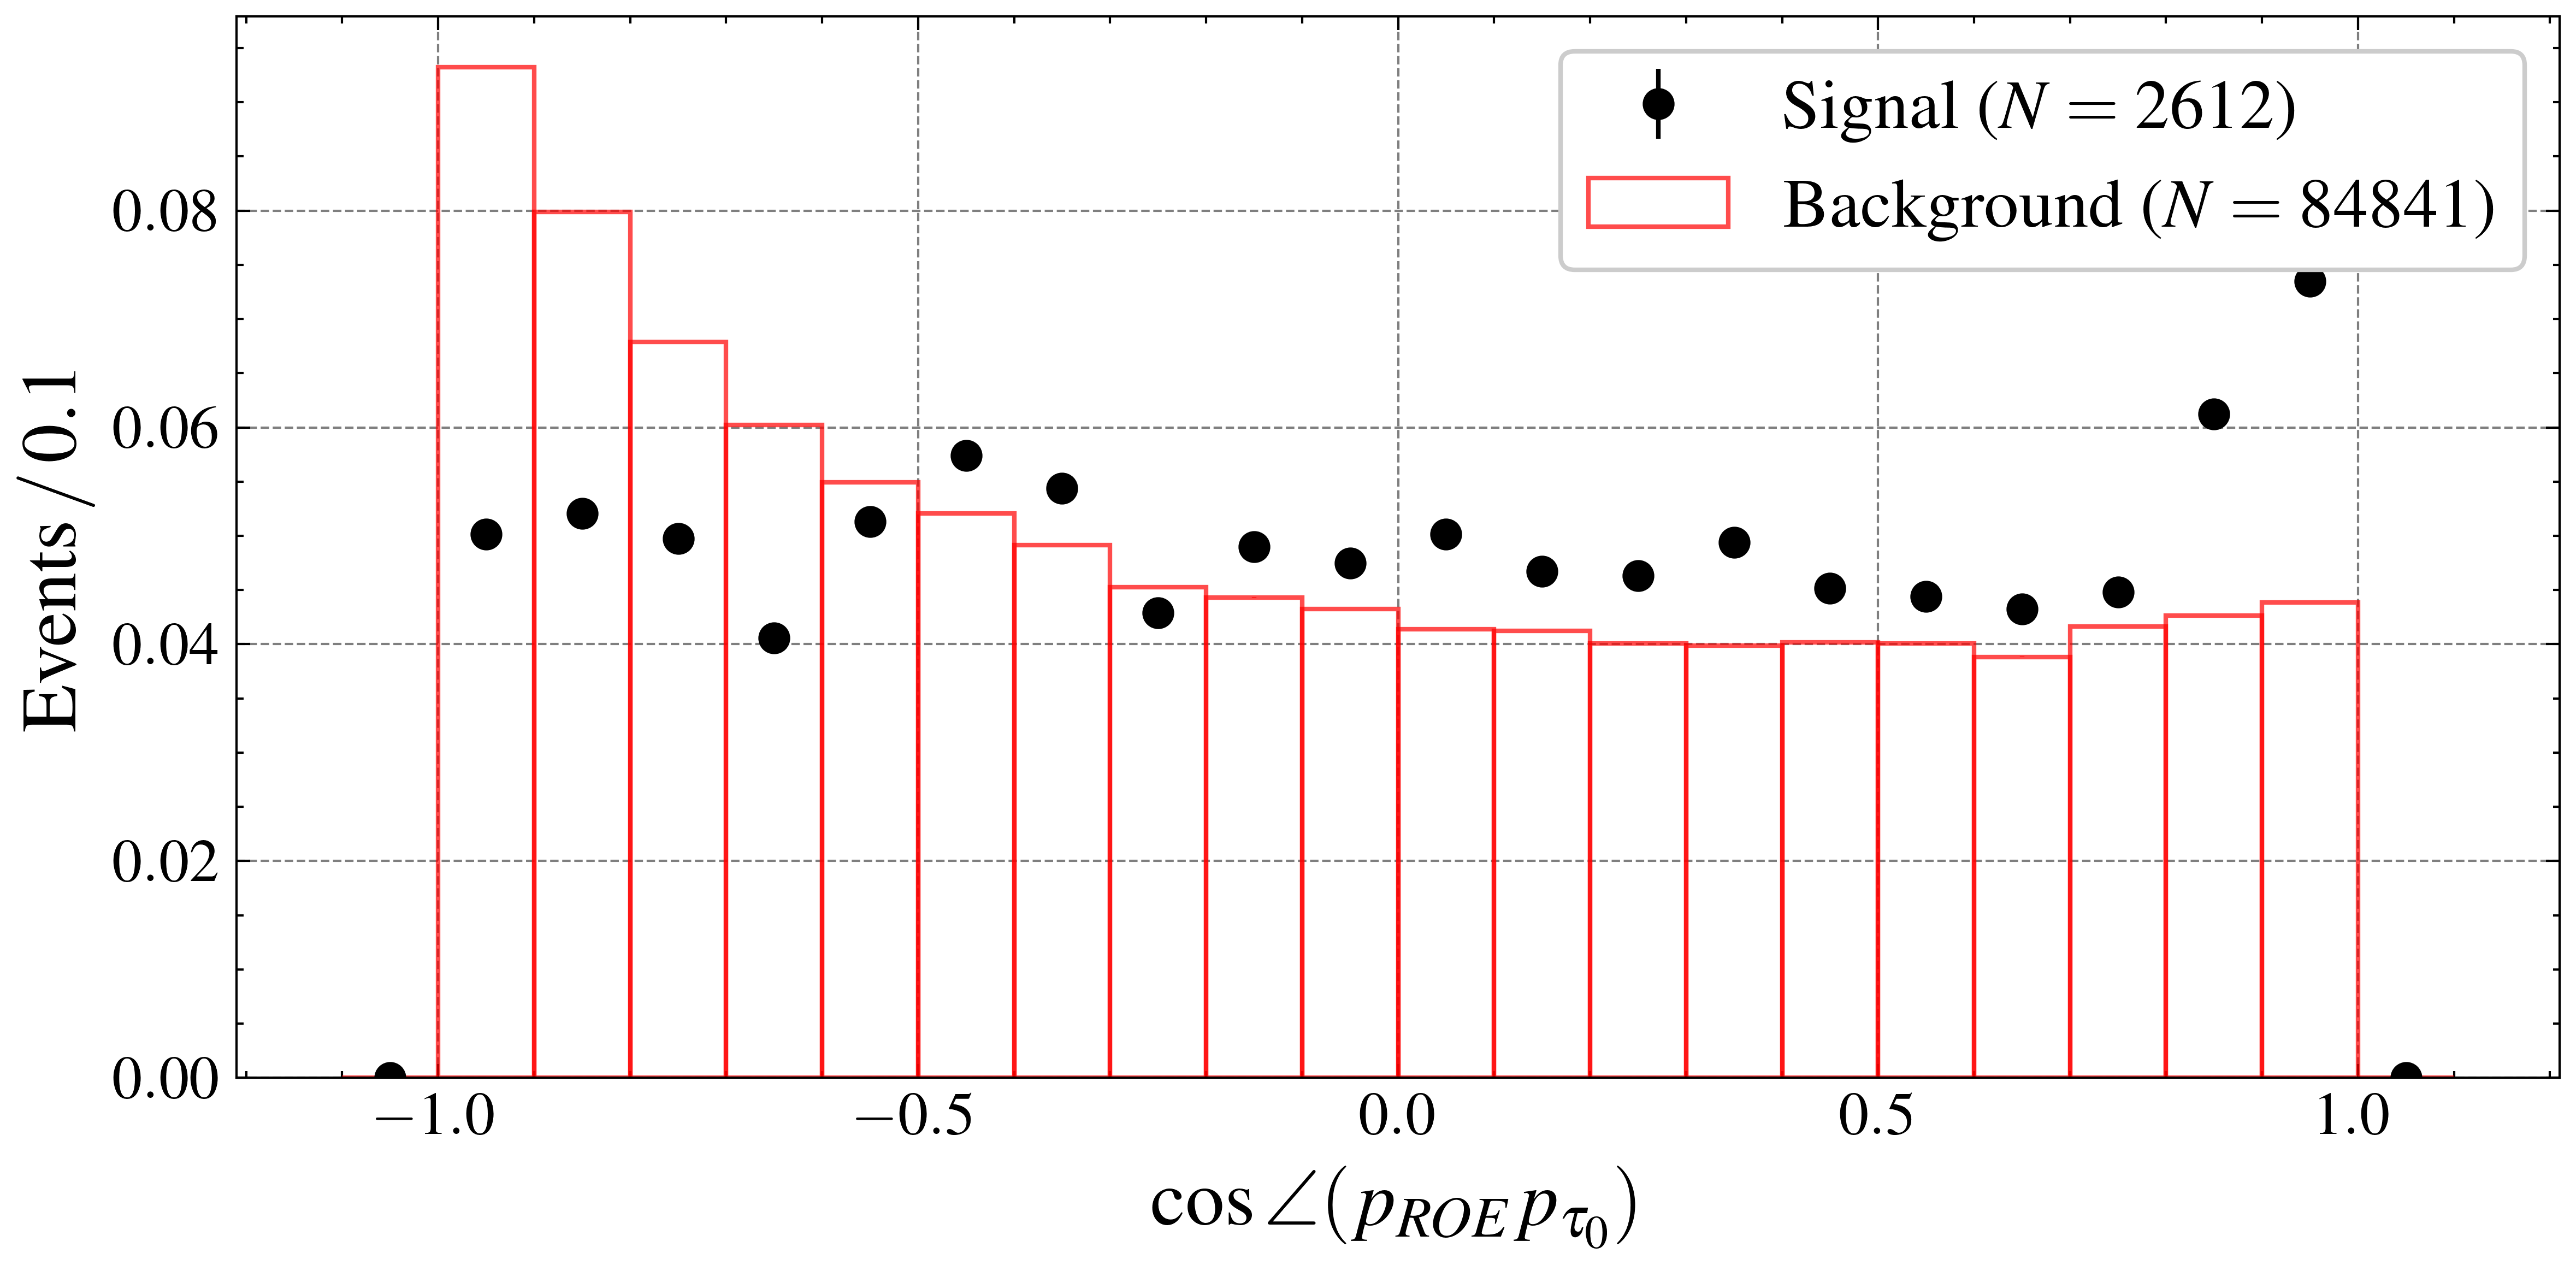

In [331]:

wbin = 0.1
a = -1.1
b = 1.1
bins = np.linspace(a, b, int((b-a)/wbin + 1))

# --- For ang_tau1_pmiss ---
fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "ang_tau0_ROE",
    filter_mask=mask_sig,
    norm=False
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)", axs=ax)

bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "ang_tau0_ROE",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep) / N_lep,
    width=wbin, align='center',
    fill=False, alpha=0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\cos \angle(p_{ROE} p_{\tau_0})$')
ax.legend()
plt.tight_layout()
plt.savefig("output/ang_tau0_ROE.pdf")
plt.show()


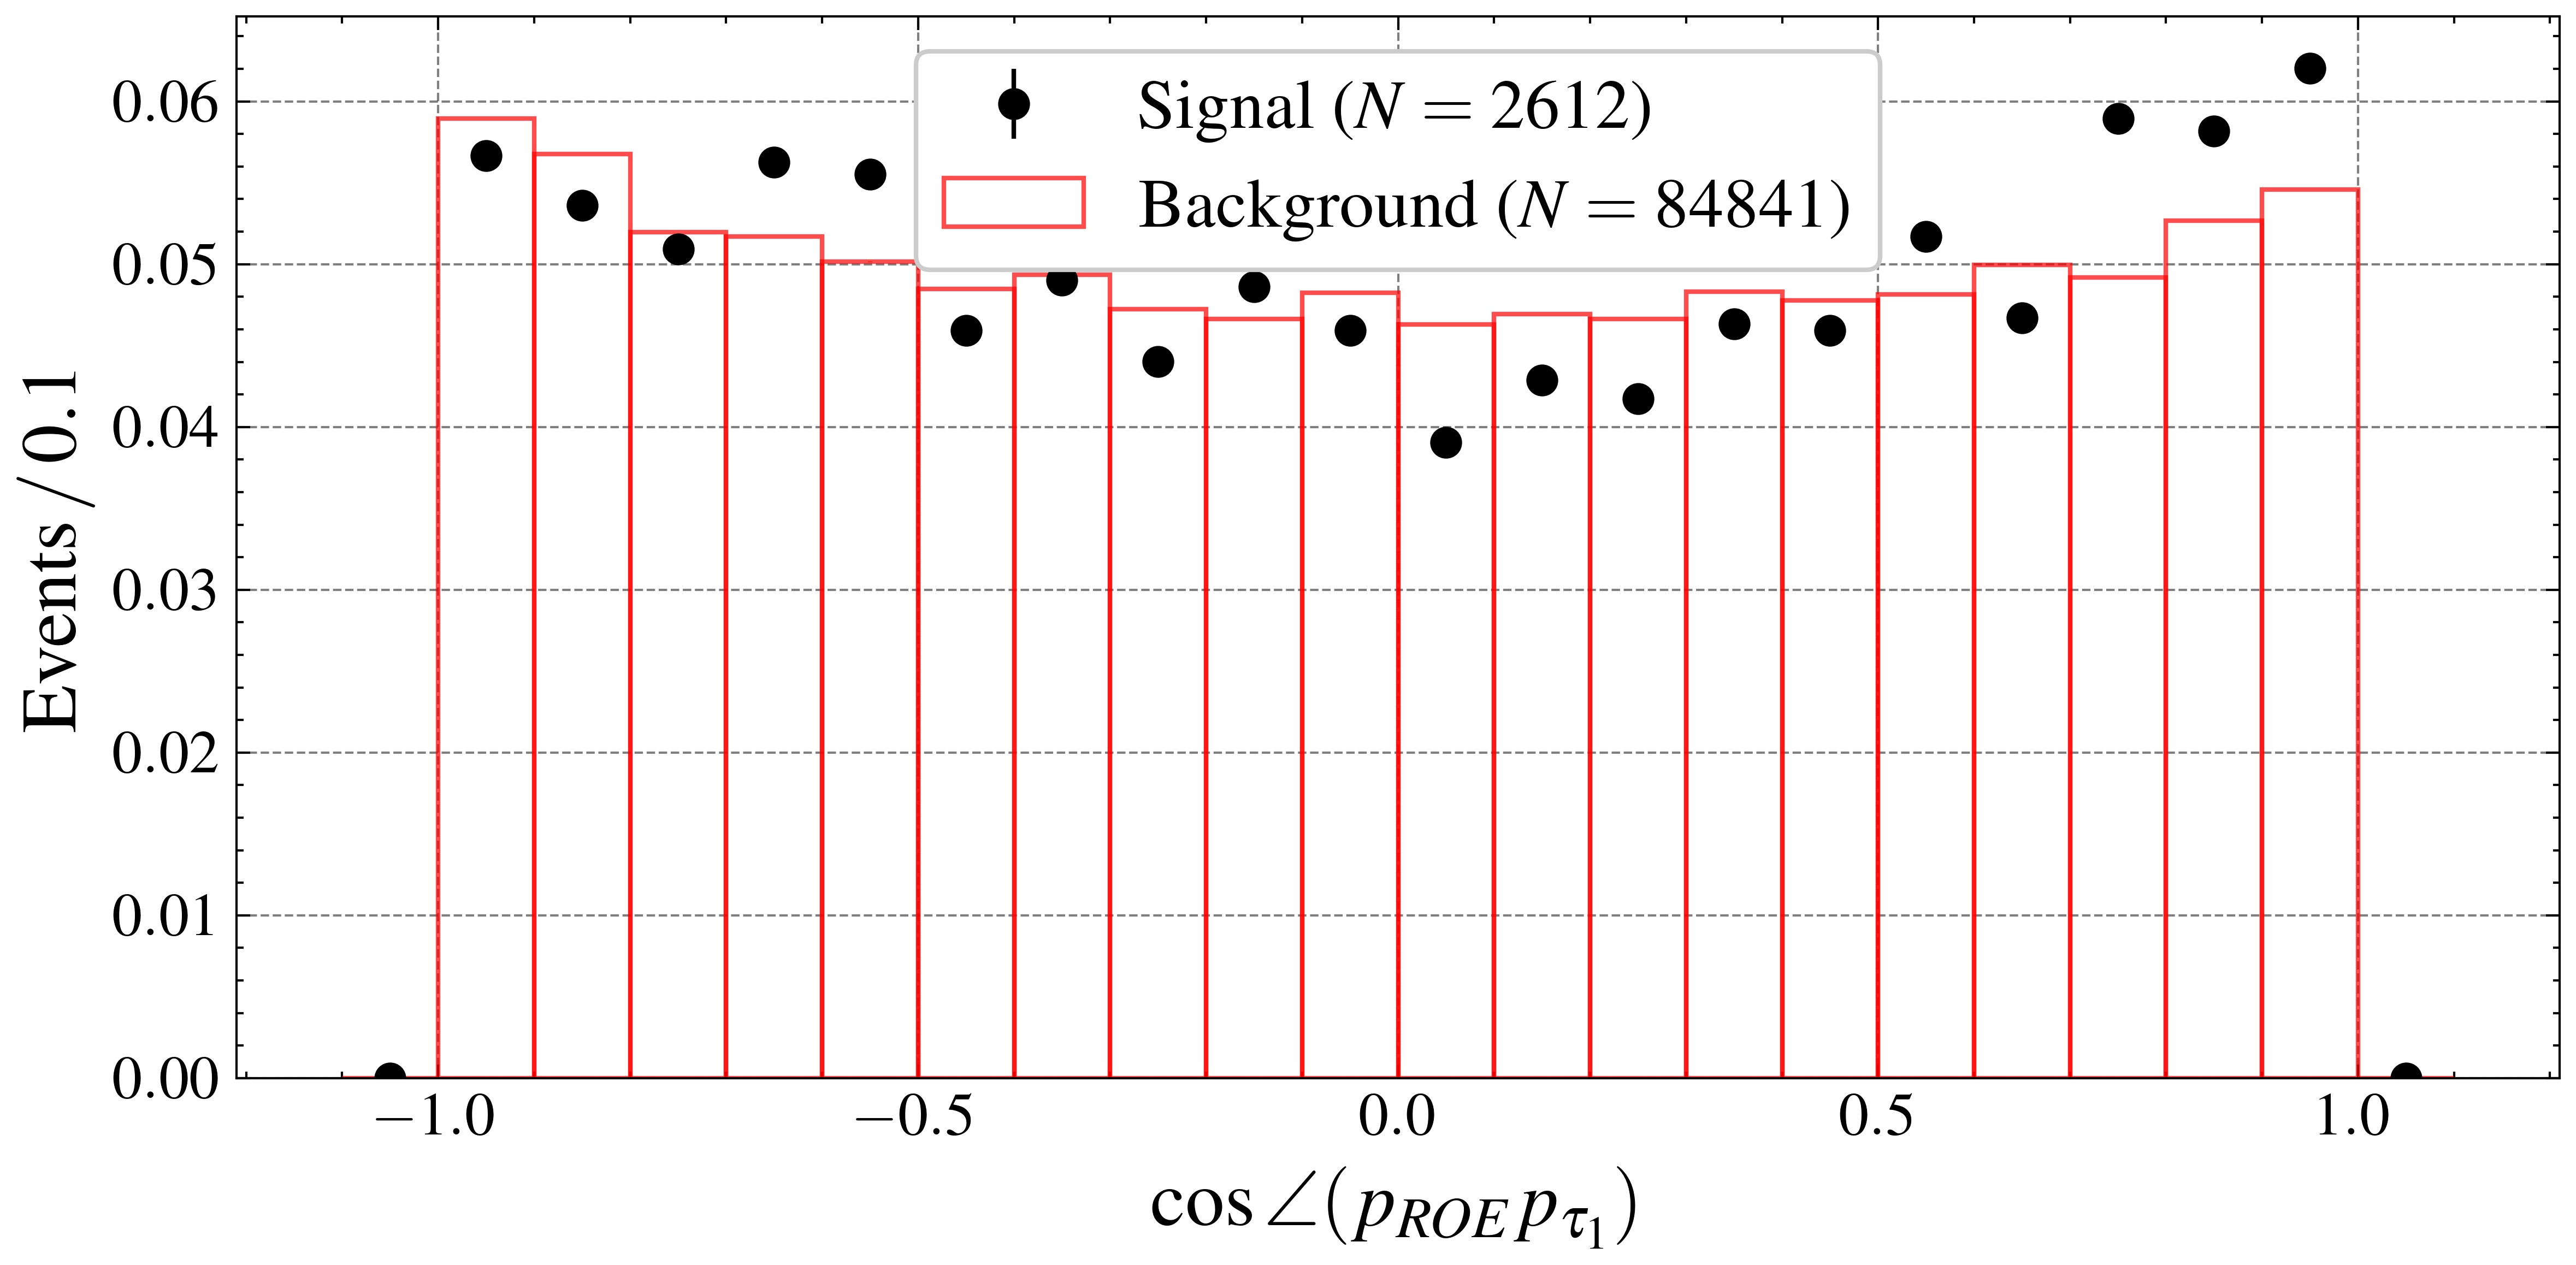

In [332]:

wbin = 0.1
a = -1.1
b = 1.1
bins = np.linspace(a, b, int((b-a)/wbin + 1))

# --- For ang_tau1_pmiss ---
fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "ang_tau1_ROE",
    filter_mask=mask_sig,
    norm=False
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)", axs=ax)

bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "ang_tau1_ROE",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep) / N_lep,
    width=wbin, align='center',
    fill=False, alpha=0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$\cos \angle(p_{ROE} p_{\tau_1})$')
ax.legend()
plt.tight_layout()
plt.savefig("output/ang_tau1_ROE.pdf")
plt.show()


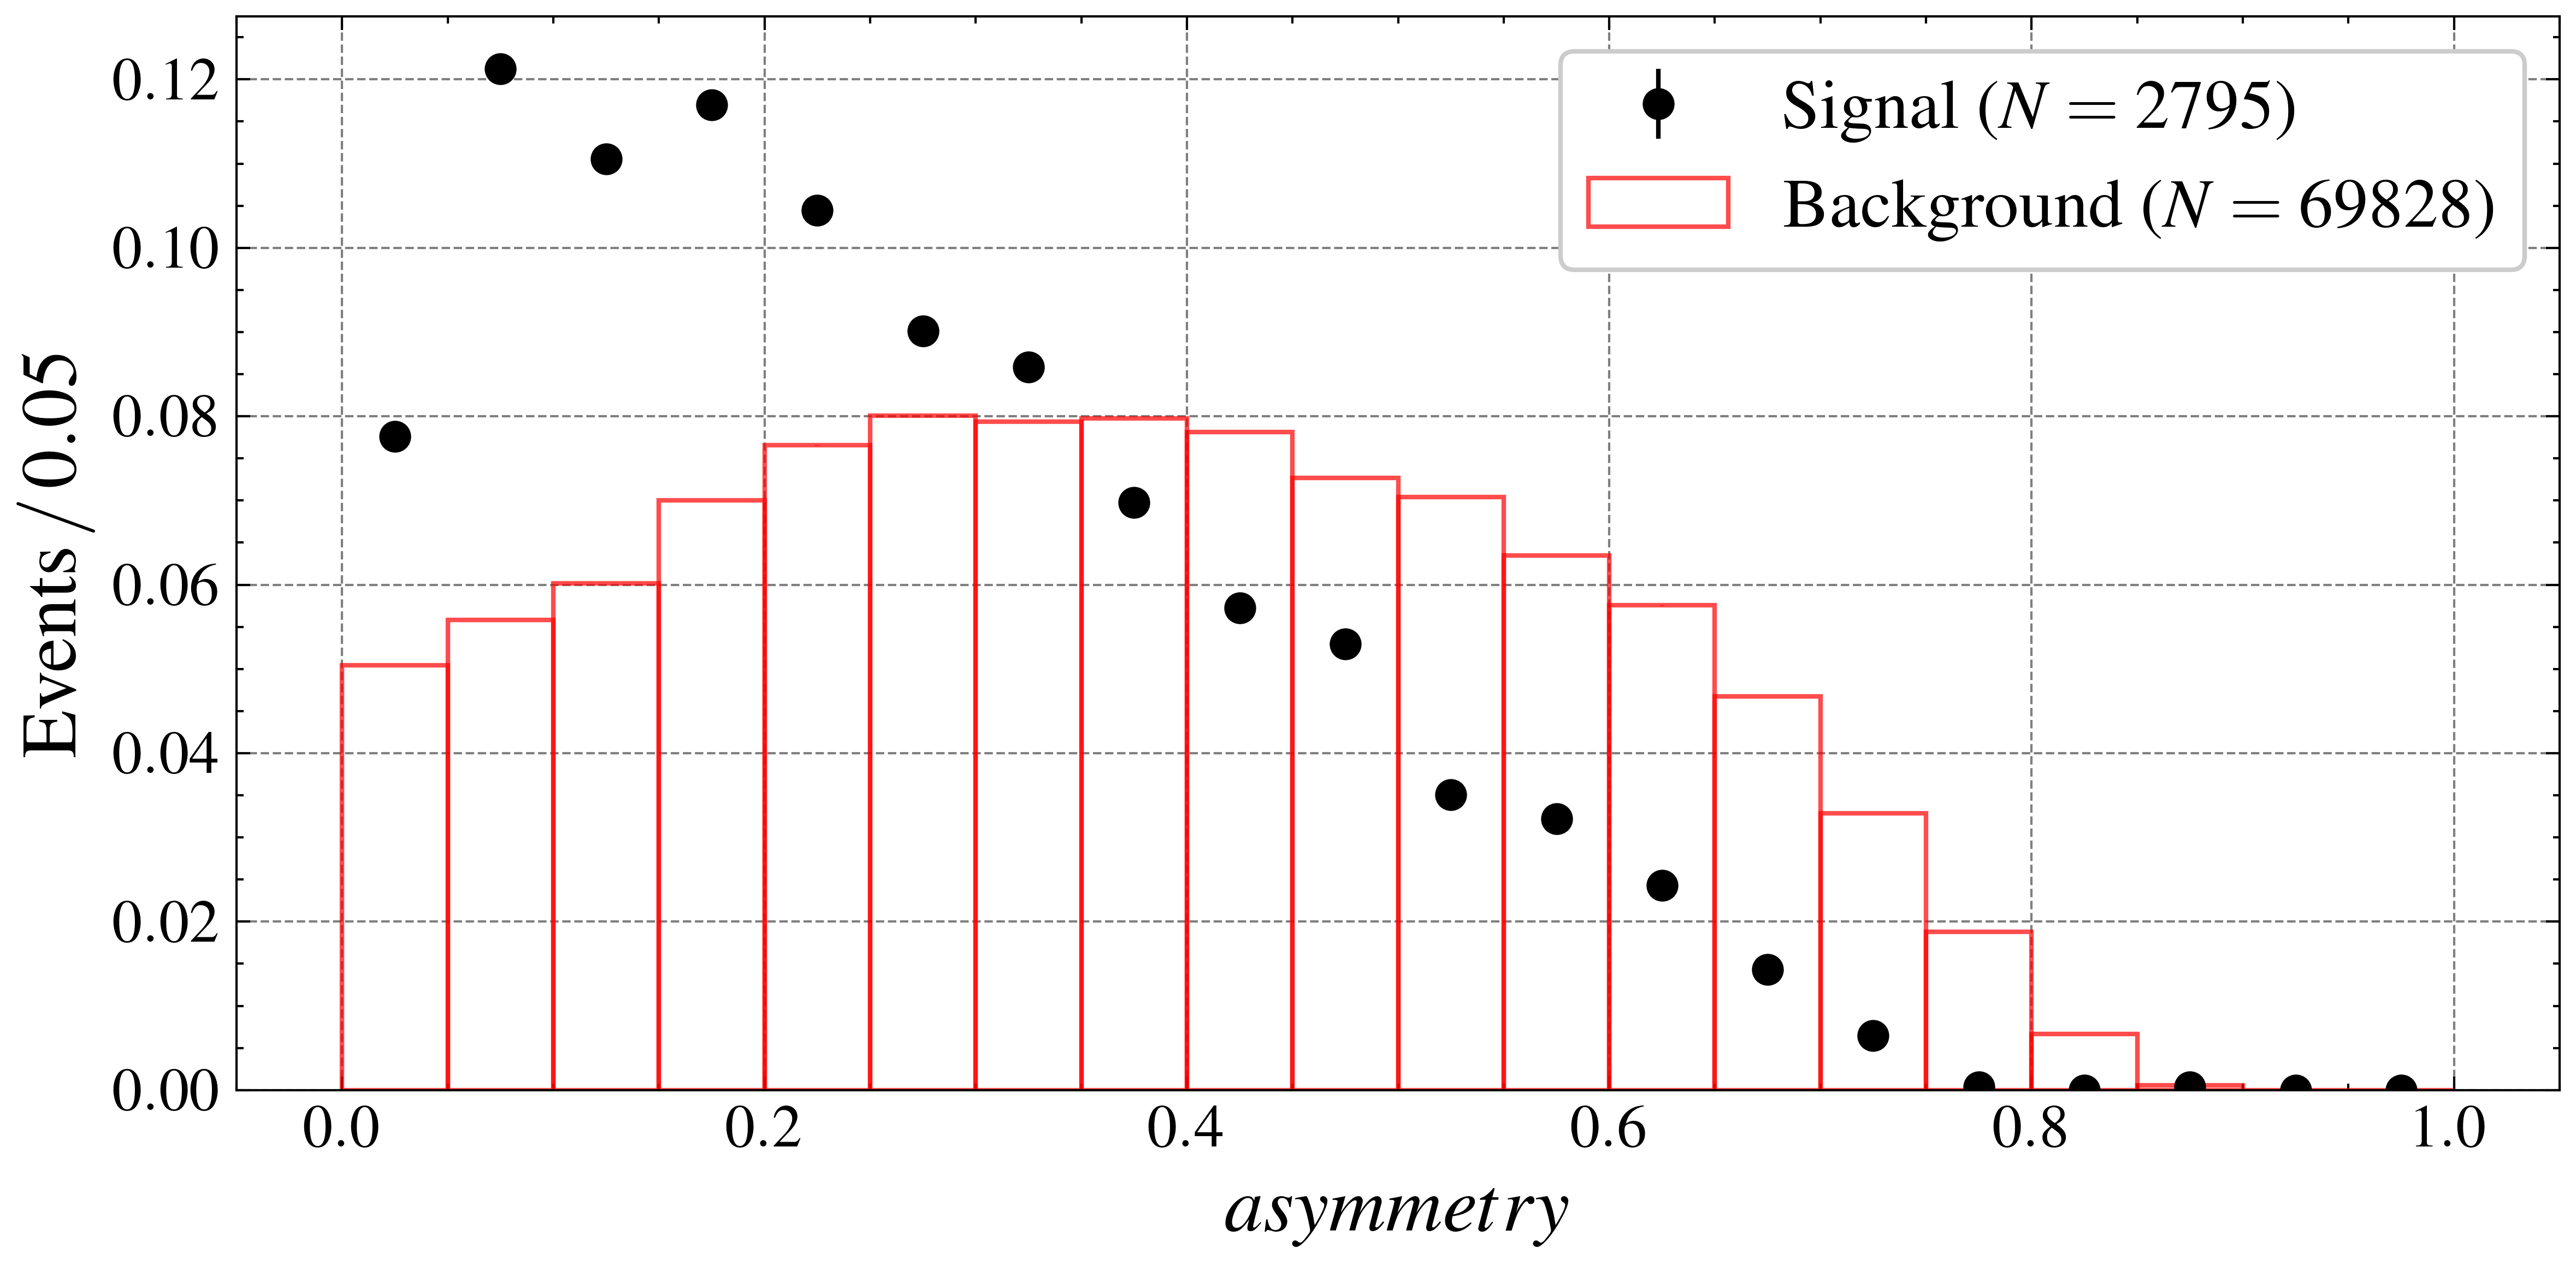

In [333]:

wbin = 0.05
a = 0
b = 1
bins = np.linspace(a, b, int((b-a)/wbin + 1))

# --- For ang_tau1_pmiss ---
fig, ax = plt.subplots(1, figsize=(12/1.5, 6/1.5))

bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "asymmetry",
    filter_mask=mask_sig,
    norm=False
)
errordot(counts_sig, bins=bins, density=True, color=colors[0], label=f"Signal ($N = {N_sig}$)", axs=ax)

bin_centers_lep, counts_lep, N_lep = compute_histogram(
    lep, bins, "asymmetry",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_lep, counts_lep,
    yerr=np.sqrt(counts_lep) / N_lep,
    width=wbin, align='center',
    fill=False, alpha=0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_lep}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}$')
ax.set_xlabel(r'$asymmetry$')
ax.legend()
plt.tight_layout()
plt.show()


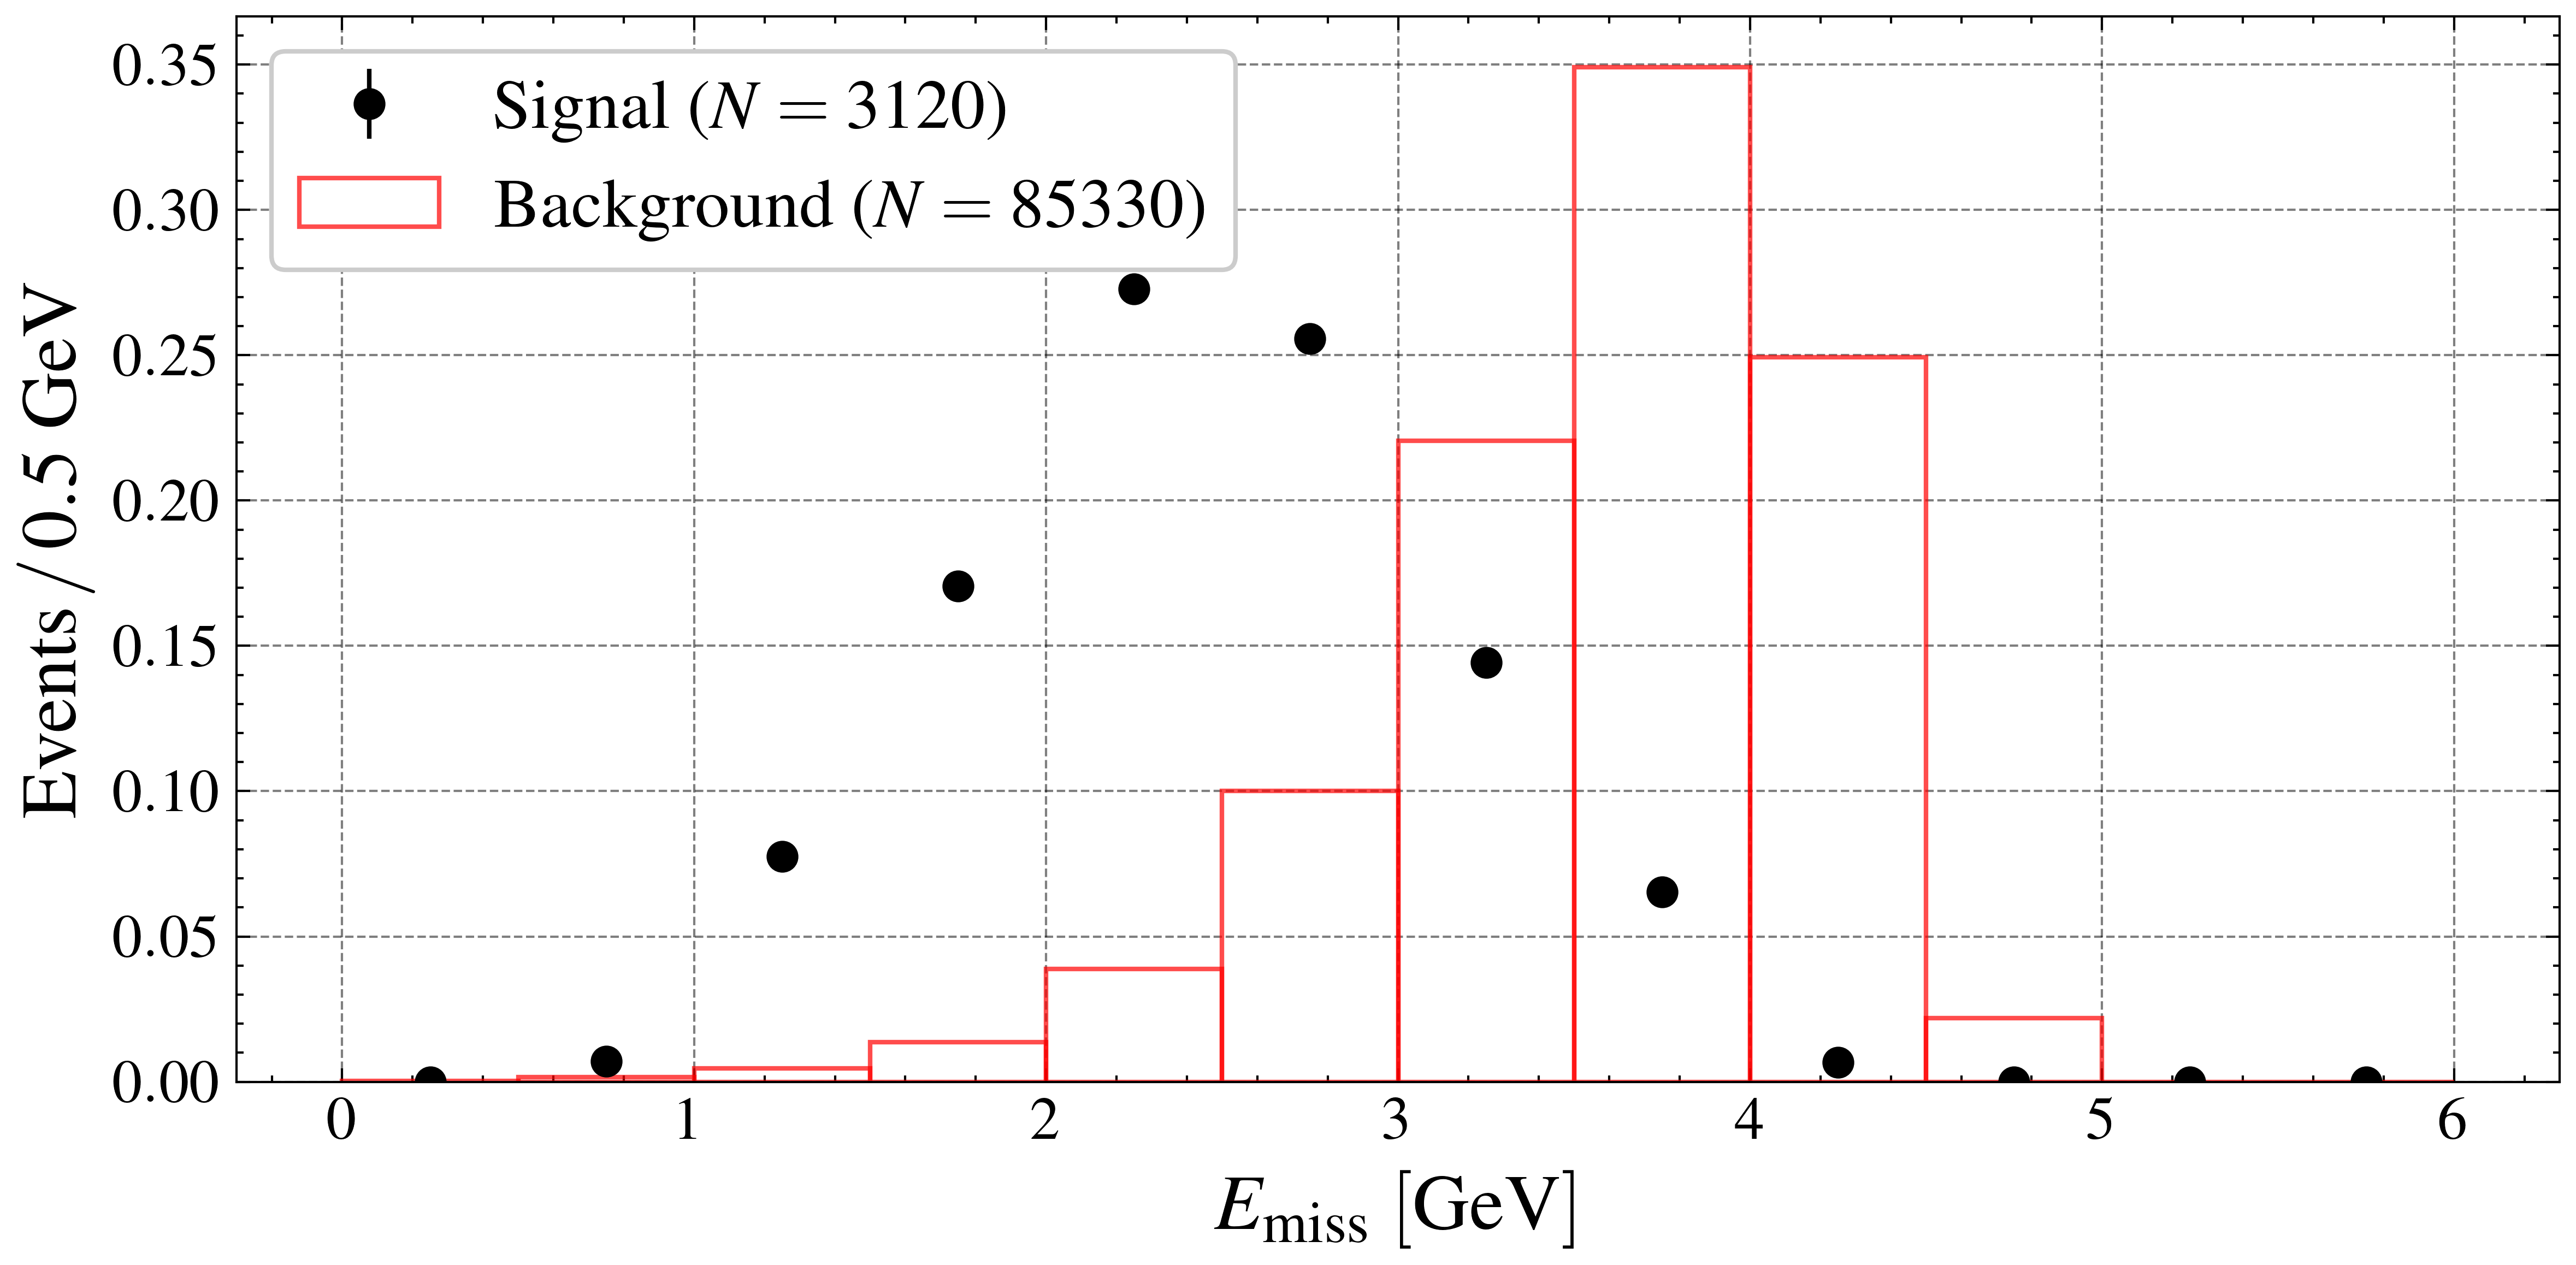

In [334]:
wbin = 0.5
a = 0
b = 6
bins = np.linspace(a, b, int((b - a) / wbin + 1))

fig, ax = plt.subplots(1, figsize=(12 / 1.5, 6 / 1.5))

# Signal
bin_centers_sig, counts_sig, N_sig = compute_histogram(
    sig, bins, "missedE",
    filter_mask=mask_sig,
    norm=False
)
errordot(counts_sig, bins=bins, density=True,
         color=colors[0], label=f"Signal ($N = {N_sig}$)", axs=ax)

# Background
bin_centers_bkg, counts_bkg, N_bkg = compute_histogram(
    lep, bins, "missedE",
    filter_mask=mask_bkg,
    norm=True
)
ax.bar(
    bin_centers_bkg, counts_bkg,
    yerr=np.sqrt(counts_bkg) / N_bkg,
    width=wbin, align='center',
    fill=False, alpha=0.7, linewidth=1,
    edgecolor=colors[1], color=colors[1], ecolor=colors[1],
    label=f"Background ($N = {N_bkg}$)"
)

ax.set_ylabel(f'$\\mathrm{{Events}}\\,/\\,{wbin}\\ \\mathrm{{GeV}}$')
ax.set_xlabel(r'$E_{\mathrm{miss}} \ \mathrm{[GeV]}$')
ax.legend()

plt.tight_layout()
plt.savefig("output/missedE.pdf")
plt.show()
